In [1]:
import bayesiantests as bt

In [2]:
# import glob
# import os
# import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('10CV_Perceptron_102datasets(12282023).csv')
df[:10]

,Unnamed: 0,Dataset,Delta,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,D,0.656,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,S,0.5507,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,1,0.5342,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,C,0.5718,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,S,0.6337,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
5,B_Acc,V,0.6413,0.6198,0.6396,0.6816,0.7205,0.676,0.7333,0.6969,0.7205
6,NaN,Dataset,Delta,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
7,Acc,D,0.82,0.808,0.836,0.84,0.816,0.844,0.676,0.808,0.808
8,F1,S,0.7561,0.7445,0.7732,0.7712,0.7465,0.7751,0.6623,0.7388,0.739
9,F.5,2,0.7641,0.7458,0.7922,0.8111,0.7723,0.8176,0.5938,0.7599,0.7609


In [4]:
df.rename(columns={'Unnamed: 0':'Metrics'}, inplace=True)
df

,Metrics,Dataset,Delta,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,D,0.656,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,S,0.5507,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,1,0.5342,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,C,0.5718,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,S,0.6337,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
...,...,...,...,...,...,...,...,...,...,...,...
708,F1,S,0.8091,0.802,0.8779,0.8846,0.8844,0.852,0.8452,0.8463,0.8323
709,F.5,105,0.8959,0.8925,0.8962,0.9027,0.8901,0.9172,0.7872,0.7865,0.7664
710,F2,C,0.7378,0.7284,0.8605,0.8673,0.879,0.7956,0.9127,0.9161,0.9109
711,Gmean,S,0.8326,0.8264,0.9139,0.9181,0.9261,0.8706,0.9512,0.9535,0.9506


In [5]:
df_a = df.drop('Dataset', axis=1)
df_a = df_a.drop('Delta', axis=1)
df_a

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
...,...,...,...,...,...,...,...,...,...
708,F1,0.802,0.8779,0.8846,0.8844,0.852,0.8452,0.8463,0.8323
709,F.5,0.8925,0.8962,0.9027,0.8901,0.9172,0.7872,0.7865,0.7664
710,F2,0.7284,0.8605,0.8673,0.879,0.7956,0.9127,0.9161,0.9109
711,Gmean,0.8264,0.9139,0.9181,0.9261,0.8706,0.9512,0.9535,0.9506


In [6]:
df.isnull().sum()

Metrics    101
Dataset      0
Delta        0
MSE          0
BCE          0
AccAim       0
F1Aim        0
F.5Aim       0
F2Aim        0
GAim         0
BAim         0
dtype: int64

In [7]:
df_a[df_a['Metrics'].isnull()]

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
6,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
13,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
20,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
27,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
34,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
...,...,...,...,...,...,...,...,...,...
678,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
685,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
692,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
699,NaN,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim


In [8]:
df_b = df_a.fillna(0)
df_b[:10]

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
5,B_Acc,0.6198,0.6396,0.6816,0.7205,0.676,0.7333,0.6969,0.7205
6,0,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
7,Acc,0.808,0.836,0.84,0.816,0.844,0.676,0.808,0.808
8,F1,0.7445,0.7732,0.7712,0.7465,0.7751,0.6623,0.7388,0.739
9,F.5,0.7458,0.7922,0.8111,0.7723,0.8176,0.5938,0.7599,0.7609


In [9]:
df_b = df_b[df_b.Metrics != 0]
df_b

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
...,...,...,...,...,...,...,...,...,...
708,F1,0.802,0.8779,0.8846,0.8844,0.852,0.8452,0.8463,0.8323
709,F.5,0.8925,0.8962,0.9027,0.8901,0.9172,0.7872,0.7865,0.7664
710,F2,0.7284,0.8605,0.8673,0.879,0.7956,0.9127,0.9161,0.9109
711,Gmean,0.8264,0.9139,0.9181,0.9261,0.8706,0.9512,0.9535,0.9506


In [10]:
df_b = df_b.reset_index(drop=True)

In [11]:
df_b[:20]

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,F1,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,F.5,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,F2,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,Gmean,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
5,B_Acc,0.6198,0.6396,0.6816,0.7205,0.676,0.7333,0.6969,0.7205
6,Acc,0.808,0.836,0.84,0.816,0.844,0.676,0.808,0.808
7,F1,0.7445,0.7732,0.7712,0.7465,0.7751,0.6623,0.7388,0.739
8,F.5,0.7458,0.7922,0.8111,0.7723,0.8176,0.5938,0.7599,0.7609
9,F2,0.7501,0.7617,0.7375,0.7274,0.739,0.7533,0.7242,0.7242


In [12]:
Data = []
for i in range(df_b.shape[0]):
    Data.append((i//6)+1)
print(Data)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 4

In [13]:
df_b.insert(loc=0, column='Dataset', value = Data)

In [14]:
df_b

,Dataset,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,1,Acc,0.644,0.66,0.664,0.664,0.66,0.668,0.668,0.664
1,1,F1,0.5189,0.5423,0.6152,0.6669,0.6045,0.6824,0.6357,0.6673
2,1,F.5,0.518,0.5362,0.5609,0.5743,0.5514,0.583,0.5702,0.5753
3,1,F2,0.5257,0.5548,0.685,0.7981,0.6739,0.8266,0.723,0.7981
4,1,Gmean,0.606,0.626,0.6725,0.6848,0.6644,0.6861,0.6825,0.6842
...,...,...,...,...,...,...,...,...,...,...
607,102,F1,0.802,0.8779,0.8846,0.8844,0.852,0.8452,0.8463,0.8323
608,102,F.5,0.8925,0.8962,0.9027,0.8901,0.9172,0.7872,0.7865,0.7664
609,102,F2,0.7284,0.8605,0.8673,0.879,0.7956,0.9127,0.9161,0.9109
610,102,Gmean,0.8264,0.9139,0.9181,0.9261,0.8706,0.9512,0.9535,0.9506


In [15]:
# data 'str'->'float'
df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)
df_b.dtypes

/tmp/57052.1.gpu/ipykernel_768935/2681397020.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)


Dataset      int64
Metrics     object
MSE        float64
BCE        float64
AccAim     float64
F1Aim      float64
F.5Aim     float64
F2Aim      float64
GAim       float64
BAim       float64
dtype: object

In [16]:
# Accuracy
df_acc = df_b[df_b['Metrics'] == "Acc"][['Dataset','Metrics','MSE','BCE','AccAim']]
df_acc = df_acc.reset_index(drop=True)
# F1
df_F1 = df_b[df_b['Metrics'] == "F1"][['Dataset','Metrics','MSE','BCE','F1Aim']]
df_F1 = df_F1.reset_index(drop=True)
# F.5
df_F05 = df_b[df_b['Metrics'] == "F.5"][['Dataset','Metrics','MSE','BCE','F.5Aim']]
df_F05 = df_F05.reset_index(drop=True)
# F2
df_F2 = df_b[df_b['Metrics'] == "F2"][['Dataset','Metrics','MSE','BCE','F2Aim']]
df_F2 = df_F2.reset_index(drop=True)
# Gmean
df_Gmean = df_b[df_b['Metrics'] == "Gmean"][['Dataset','Metrics','MSE','BCE','GAim']]
df_Gmean = df_Gmean.reset_index(drop=True)
# B_Acc
df_B_Acc = df_b[df_b['Metrics'] == "B_Acc"][['Dataset','Metrics','MSE','BCE','BAim']]
df_B_Acc = df_B_Acc.reset_index(drop=True)

In [17]:
df_acc

,Dataset,Metrics,MSE,BCE,AccAim
0,1,Acc,0.6440,0.6600,0.6640
1,2,Acc,0.8080,0.8360,0.8400
2,3,Acc,0.7385,0.7449,0.7649
3,4,Acc,0.8290,0.8452,0.8548
4,5,Acc,0.6687,0.6750,0.6719
...,...,...,...,...,...
97,98,Acc,0.9312,0.9314,0.9315
98,99,Acc,0.8955,0.9108,0.9122
99,100,Acc,0.9131,0.9247,0.9286
100,101,Acc,0.8131,0.8193,0.8174


In [18]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
def stacked_bar(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize='small')

    return fig, ax

In [19]:
baselines = ['MSE','BCE']
ours = ['AccAim','F1Aim','F.5Aim','F2Aim','GAim','BAim']
dfs = [df_acc,df_F1,df_F05,df_F2,df_Gmean,df_B_Acc]

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 0.9951, P(AccAim > MSE) = 0.0049
0.0 0.9951 0.0049


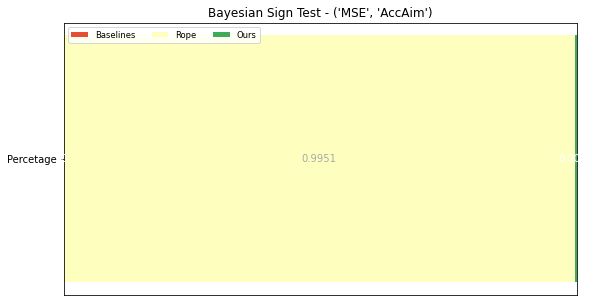

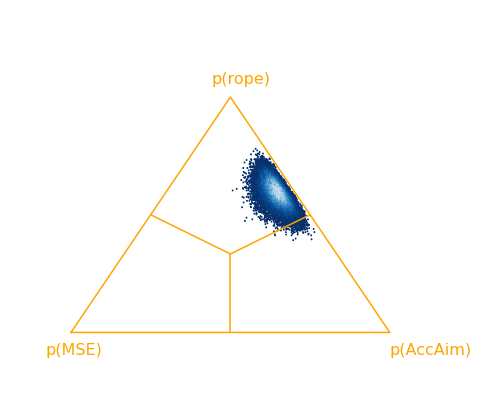

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


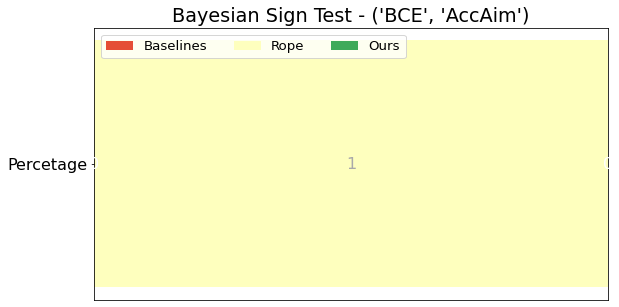

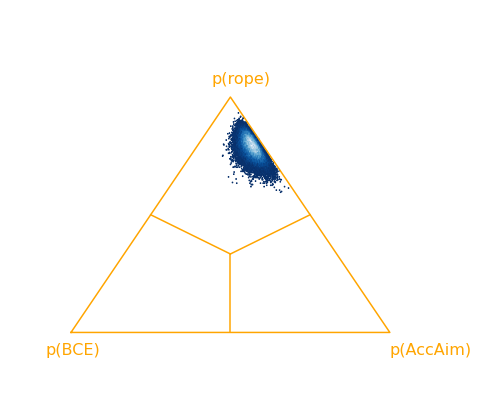

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > MSE) = 1.0
0.0 0.0 1.0


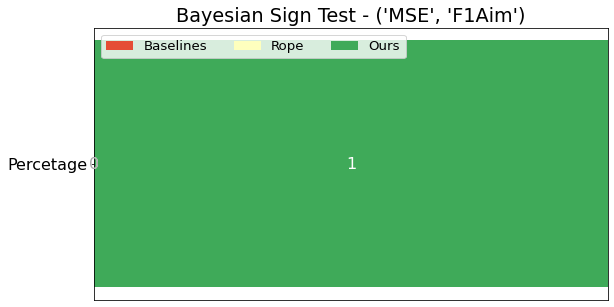

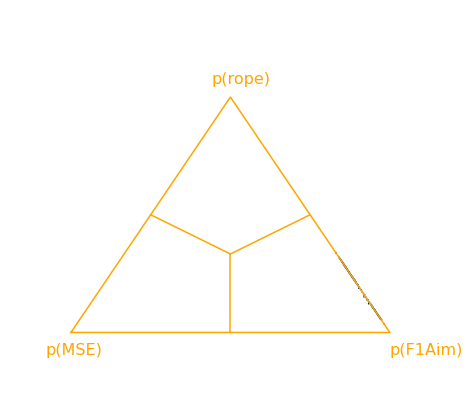

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > BCE) = 1.0
0.0 0.0 1.0


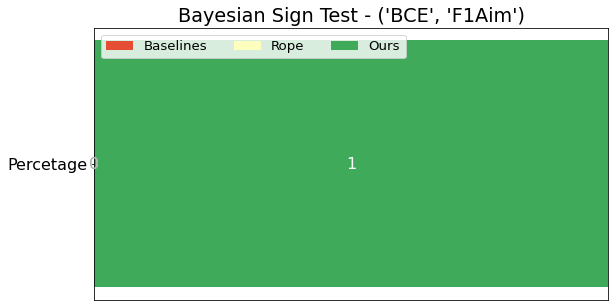

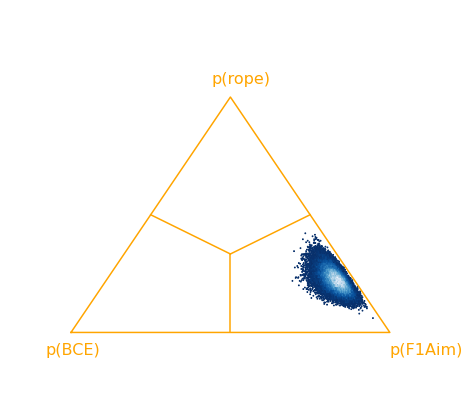

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.0, P(F.5Aim > MSE) = 1.0
0.0 0.0 1.0


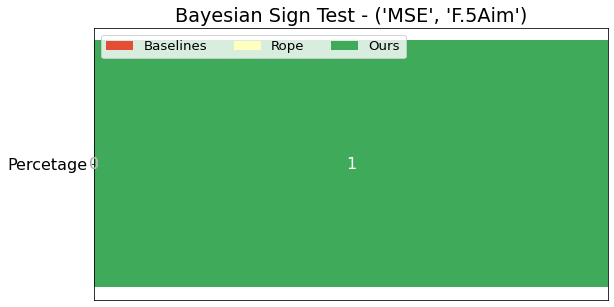

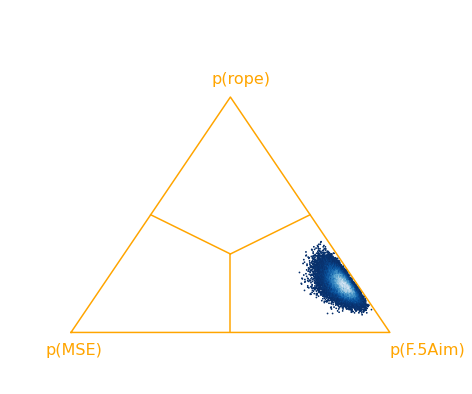

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.0, P(F.5Aim > BCE) = 1.0
0.0 0.0 1.0


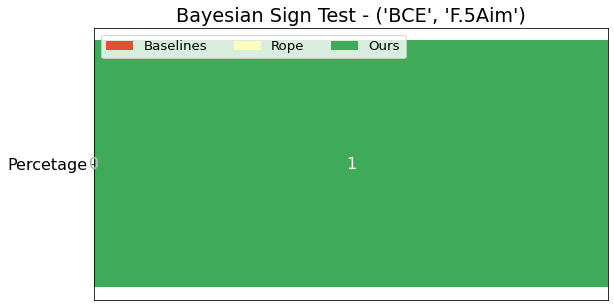

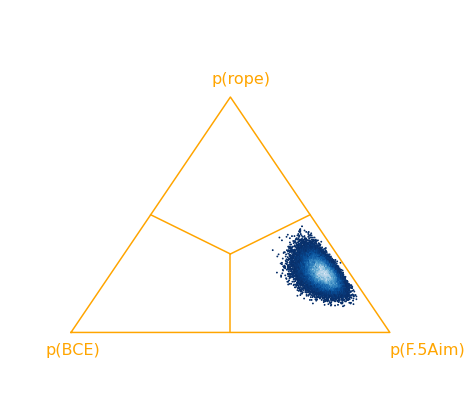

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


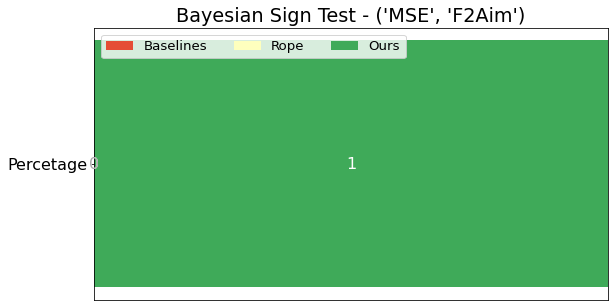

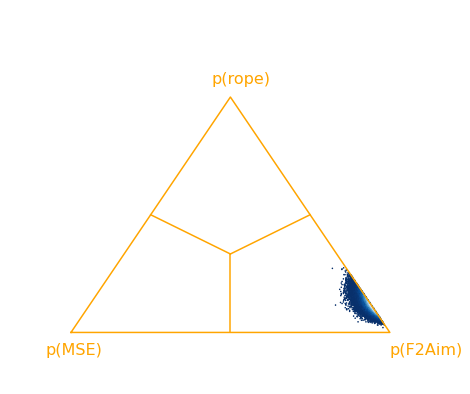

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > BCE) = 1.0
0.0 0.0 1.0


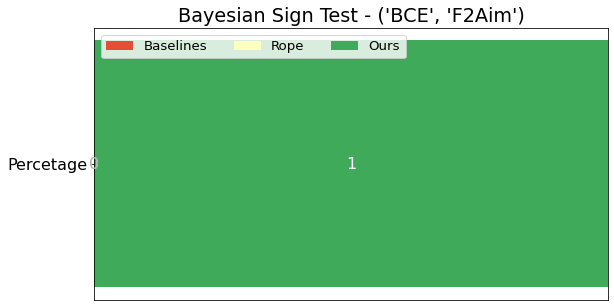

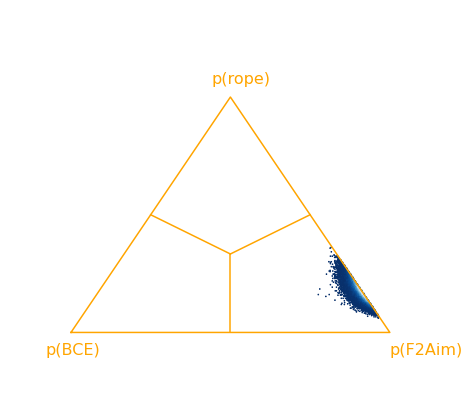

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.0, P(GAim > MSE) = 1.0
0.0 0.0 1.0


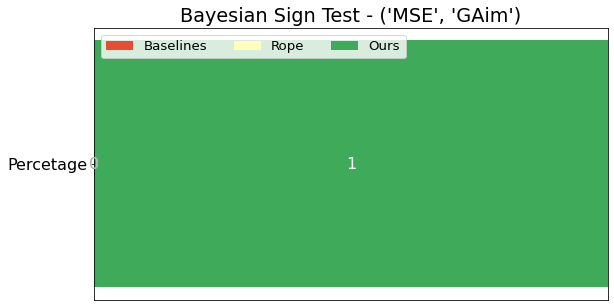

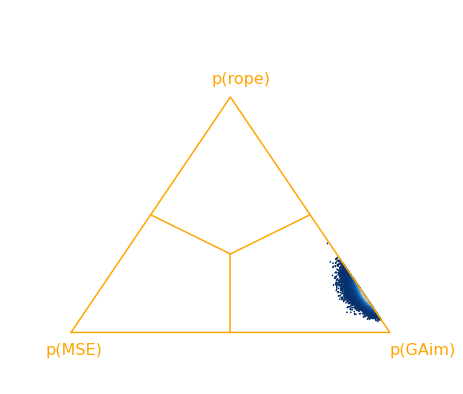

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.0, P(GAim > BCE) = 1.0
0.0 0.0 1.0


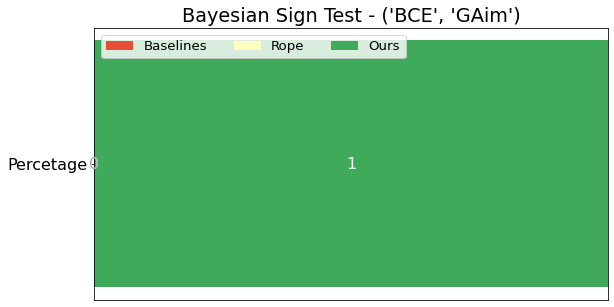

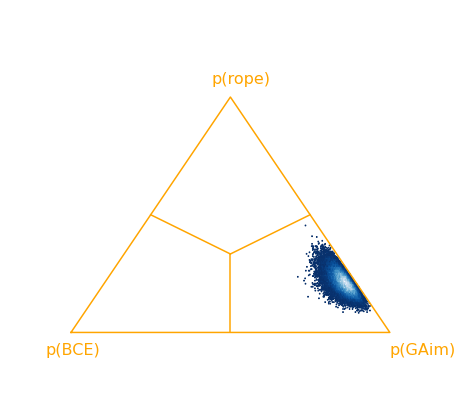

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.0, P(BAim > MSE) = 1.0
0.0 0.0 1.0


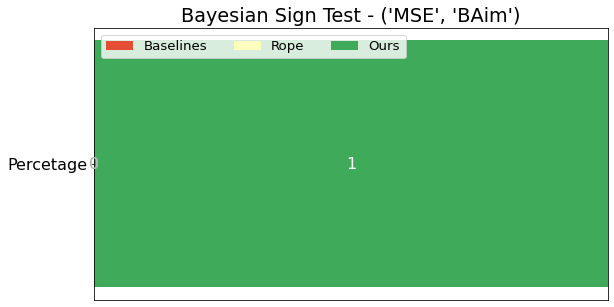

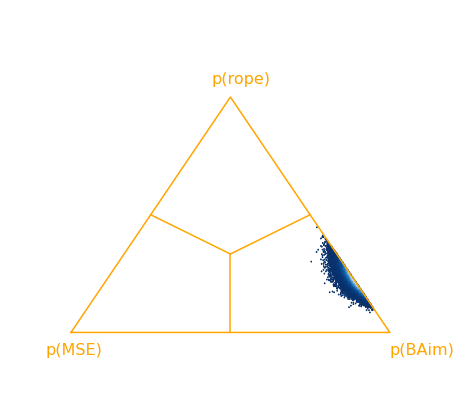

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 2e-05, P(BAim > BCE) = 0.99998
0.0 2e-05 0.99998


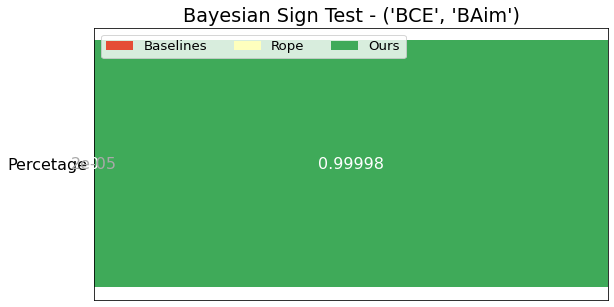

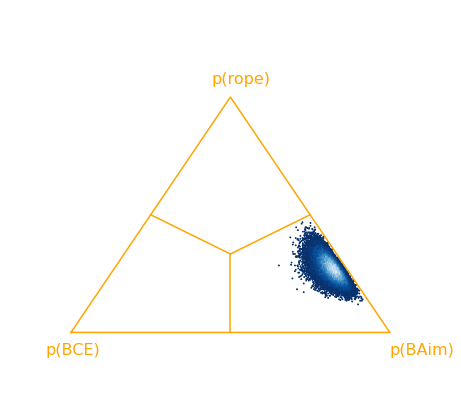

In [20]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.01, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.01)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [21]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.9951, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2e-05]
[0.0049, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99998]


In [22]:
# r = 0.01
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,0.99510,0.00490
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.00000,1.00000
3,BCE,F1Aim,0.0,0.00000,1.00000
4,MSE,F.5Aim,0.0,0.00000,1.00000
5,BCE,F.5Aim,0.0,0.00000,1.00000
6,MSE,F2Aim,0.0,0.00000,1.00000
7,BCE,F2Aim,0.0,0.00000,1.00000
8,MSE,GAim,0.0,0.00000,1.00000
9,BCE,GAim,0.0,0.00000,1.00000


In [23]:
results[results["Baseline"]=='MSE']['Basewin_prob']

0     0.0
2     0.0
4     0.0
6     0.0
8     0.0
10    0.0
Name: Basewin_prob, dtype: float64

In [24]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

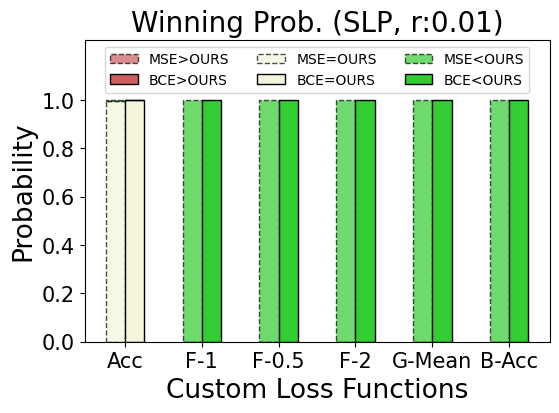

In [25]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.01)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

# 위에거 새로운 그래프로 만들어보기

In [28]:
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,0.99510,0.00490
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.00000,1.00000
3,BCE,F1Aim,0.0,0.00000,1.00000
4,MSE,F.5Aim,0.0,0.00000,1.00000
5,BCE,F.5Aim,0.0,0.00000,1.00000
6,MSE,F2Aim,0.0,0.00000,1.00000
7,BCE,F2Aim,0.0,0.00000,1.00000
8,MSE,GAim,0.0,0.00000,1.00000
9,BCE,GAim,0.0,0.00000,1.00000


In [32]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,0.99510,0.00490
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.00000,1.00000
3,BCE,F1Aim,0.0,0.00000,1.00000
10,MSE,BAim,0.0,0.00000,1.00000
11,BCE,BAim,0.0,0.00002,0.99998


In [42]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
# plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기


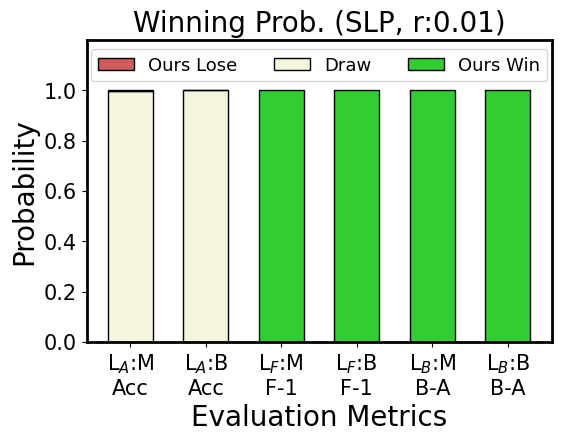

In [44]:
# plt.figure(figsize=(10, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
#          'L$_{F}$:M\nF-0.5','L$_{F}$:B\nF-0.5','L$_{F}$:M\nF-2','L$_{F}$:B\nF-2','L$_{G}$:M\nG-M','L$_{G}$:B\nG-M',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose    
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.01)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

In [52]:
# titles = ['Accuracy','F-1','F-0.5','F-2','G-Mean','B-Accuracy']
# bar_width = 0.5

# for i in range(len(titles)):    
#     plt.bar(["P_P","P_D","BCE"], results["Ourswin_prob"][3*i:3*(i+1)], bar_width, color="sandybrown", label = "LOSE", edgecolor="black")
#     plt.bar(["P_P","P_D","BCE"], results["Draw_prob"][3*i:3*(i+1)], bar_width, color="moccasin", 
#             bottom=results["Ourswin_prob"][3*i:3*(i+1)], label = "DRAW", edgecolor="black")
#     plt.bar(["P_P","P_D","BCE"], results["Basewin_prob"][3*i:3*(i+1)], bar_width, color="seagreen", 
#             bottom=results["Ourswin_prob"][3*i:3*(i+1)] + results["Draw_prob"][3*i:3*(i+1)], label = "WIN", edgecolor="black")

#     plt.title(titles[i])
#     plt.ylim(0.0 ,1.1)
#     plt.xlabel("Baselines")
#     plt.ylabel("Probability")
#     plt.legend()
#     plt.xticks()
#     plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


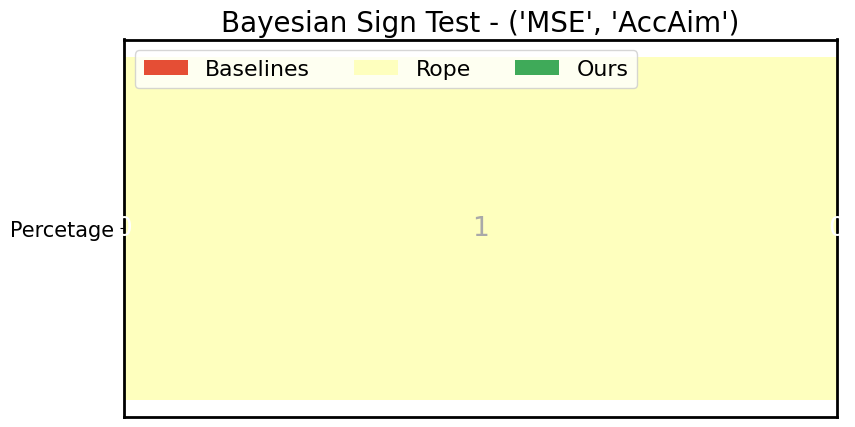

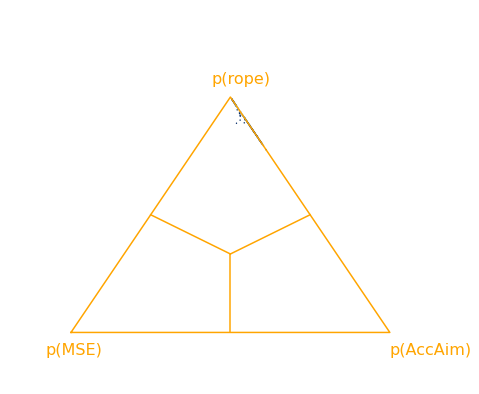

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


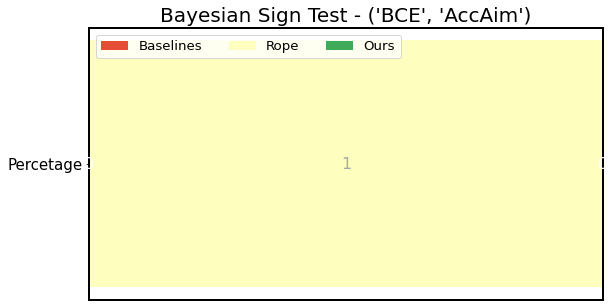

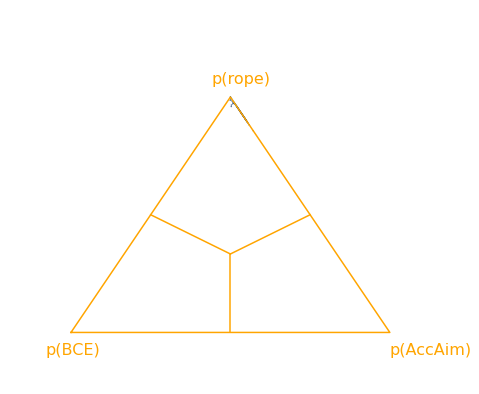

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.00074, P(F1Aim > MSE) = 0.99926
0.0 0.00074 0.99926


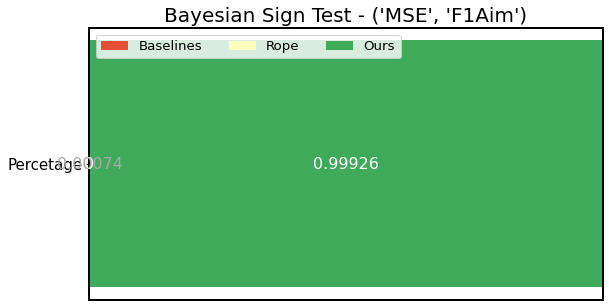

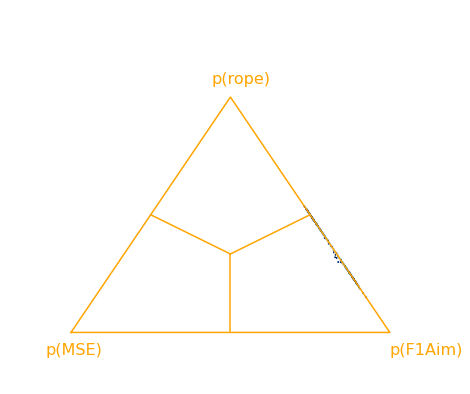

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.24112, P(F1Aim > BCE) = 0.75888
0.0 0.24112 0.75888


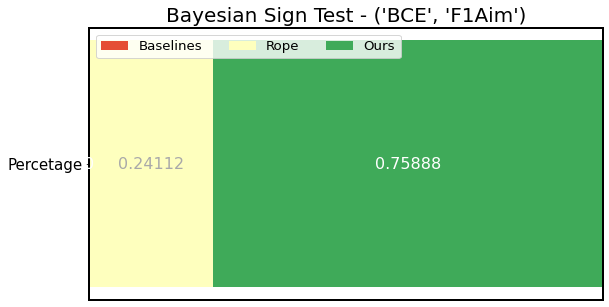

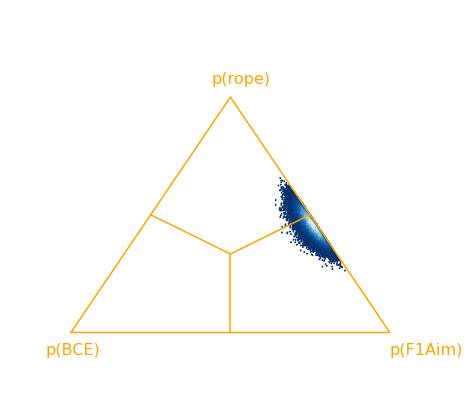

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.27948, P(F.5Aim > MSE) = 0.72052
0.0 0.27948 0.72052


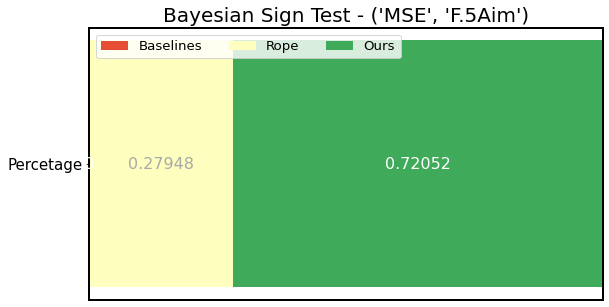

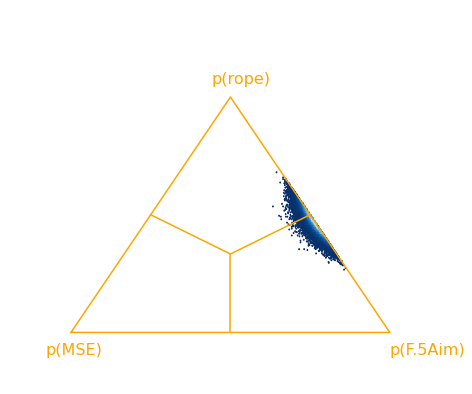

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.99718, P(F.5Aim > BCE) = 0.00282
0.0 0.99718 0.00282


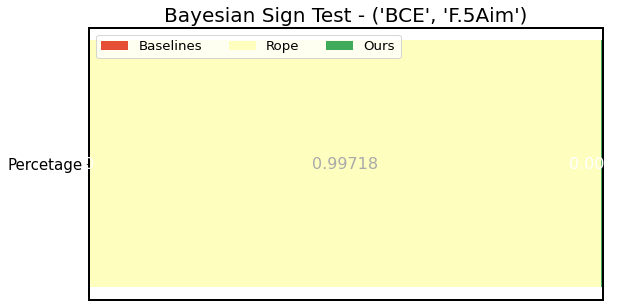

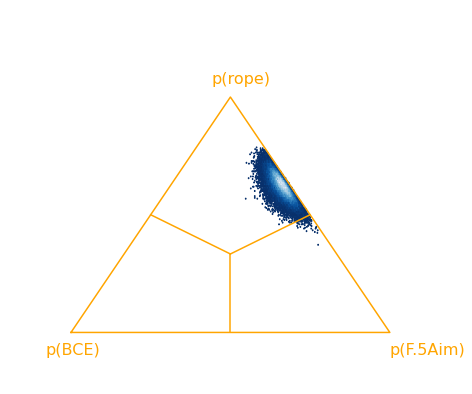

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


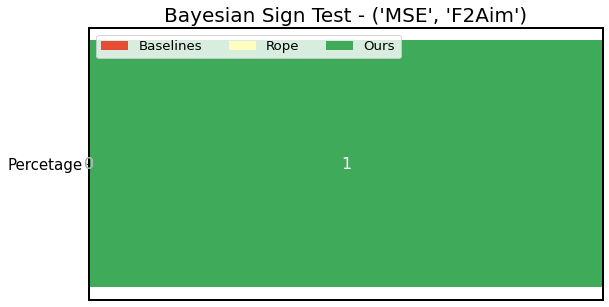

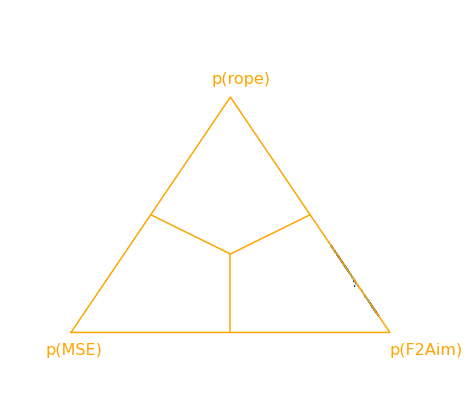

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 2e-05, P(F2Aim > BCE) = 0.99998
0.0 2e-05 0.99998


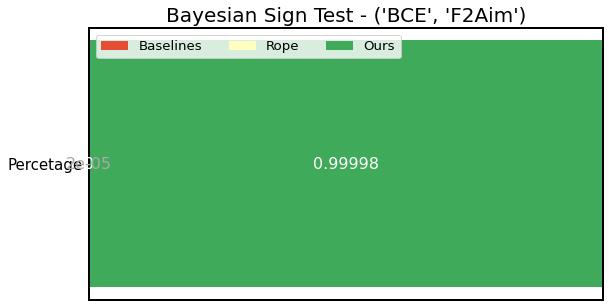

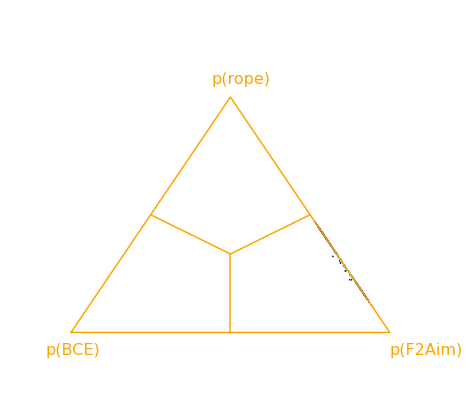

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 8e-05, P(GAim > MSE) = 0.99992
0.0 8e-05 0.99992


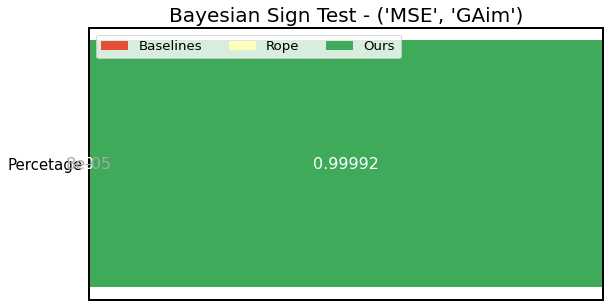

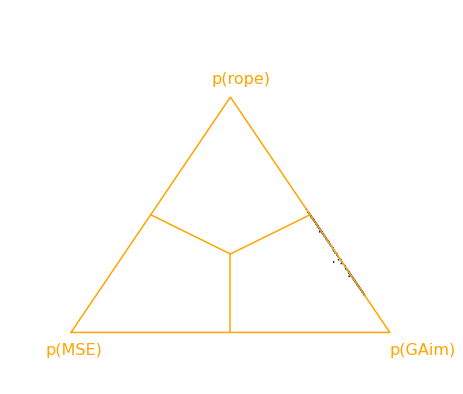

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.06956, P(GAim > BCE) = 0.93044
0.0 0.06956 0.93044


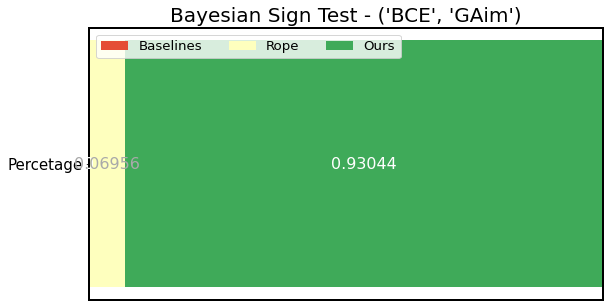

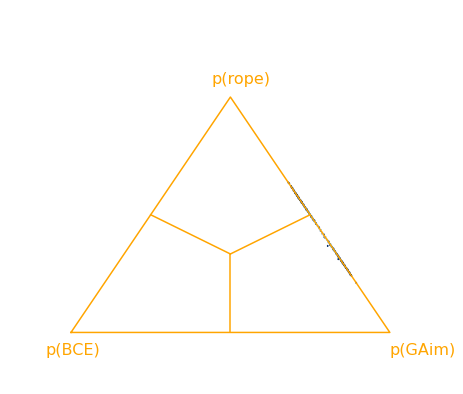

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.0684, P(BAim > MSE) = 0.9316
0.0 0.0684 0.9316


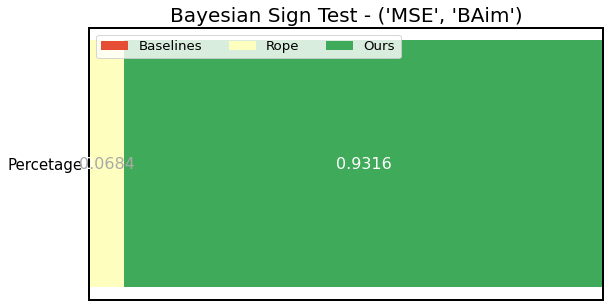

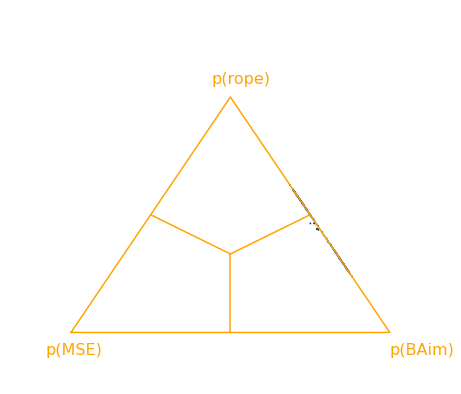

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.86286, P(BAim > BCE) = 0.13714
0.0 0.86286 0.13714


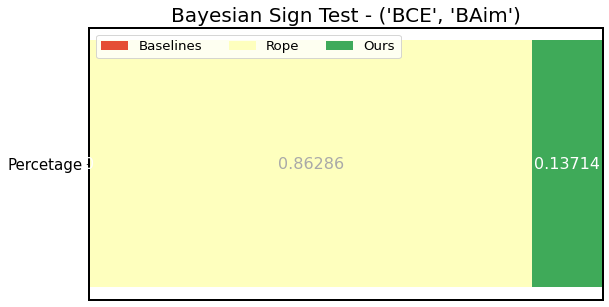

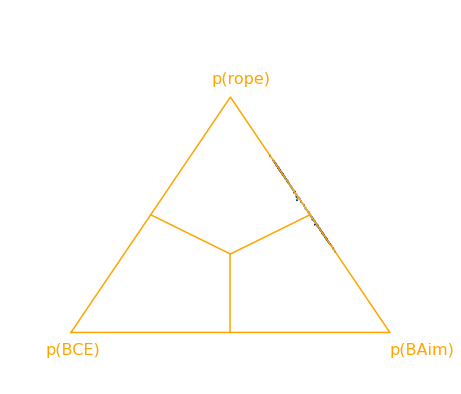

In [45]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.05, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.05)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [46]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 0.00074, 0.24112, 0.27948, 0.99718, 0.0, 2e-05, 8e-05, 0.06956, 0.0684, 0.86286]
[0.0, 0.0, 0.99926, 0.75888, 0.72052, 0.00282, 1.0, 0.99998, 0.99992, 0.93044, 0.9316, 0.13714]


In [47]:
# r = 0.05
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.00074,0.99926
3,BCE,F1Aim,0.0,0.24112,0.75888
4,MSE,F.5Aim,0.0,0.27948,0.72052
5,BCE,F.5Aim,0.0,0.99718,0.00282
6,MSE,F2Aim,0.0,0.00000,1.00000
7,BCE,F2Aim,0.0,0.00002,0.99998
8,MSE,GAim,0.0,0.00008,0.99992
9,BCE,GAim,0.0,0.06956,0.93044


In [48]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

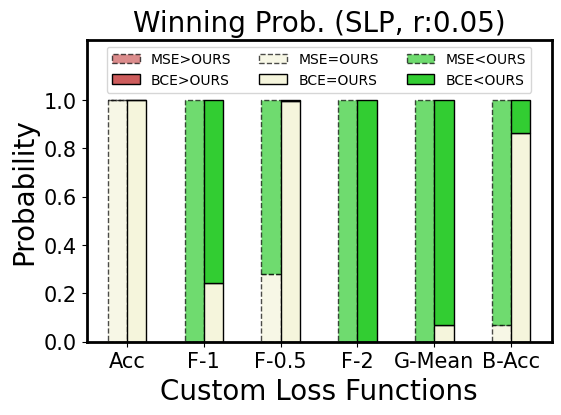

In [49]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

# 위에거 새로운 그래프로 만들어보기

In [50]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.00074,0.99926
3,BCE,F1Aim,0.0,0.24112,0.75888
10,MSE,BAim,0.0,0.06840,0.93160
11,BCE,BAim,0.0,0.86286,0.13714


In [51]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 30  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
# plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기


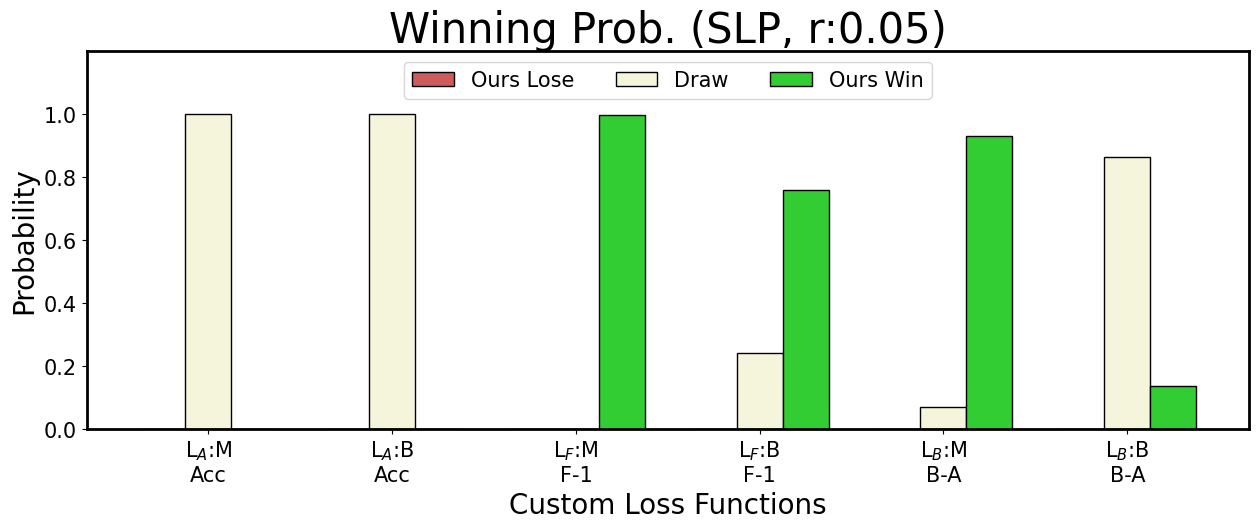

In [54]:
plt.figure(figsize=(15, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
#          'L$_{F}$:M\nF-0.5','L$_{F}$:B\nF-0.5','L$_{F}$:M\nF-2','L$_{F}$:B\nF-2','L$_{G}$:M\nG-M','L$_{G}$:B\nG-M',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose    
p1 = plt.bar(index-bar_width*1, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index+bar_width*1, win, bar_width, color="limegreen", label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=15, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [55]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
# plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기


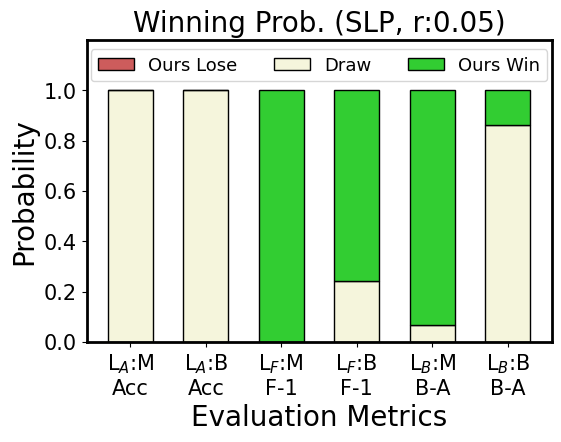

In [57]:
# plt.figure(figsize=(10, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
#          'L$_{F}$:M\nF-0.5','L$_{F}$:B\nF-0.5','L$_{F}$:M\nF-2','L$_{F}$:B\nF-2','L$_{G}$:M\nG-M','L$_{G}$:B\nG-M',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose    
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


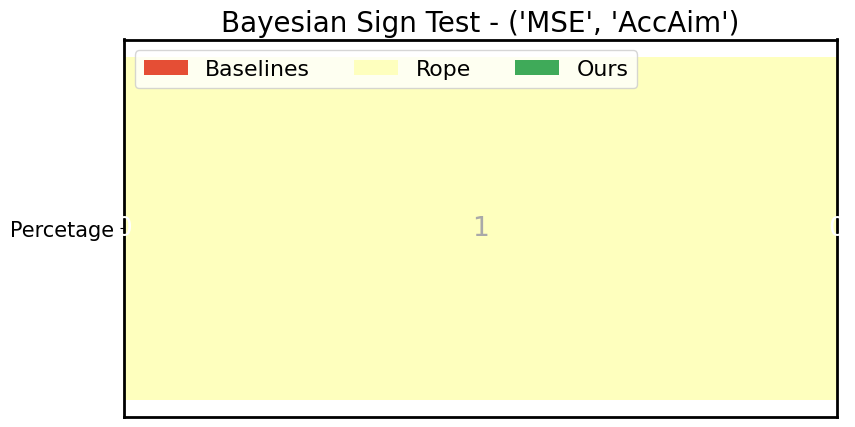

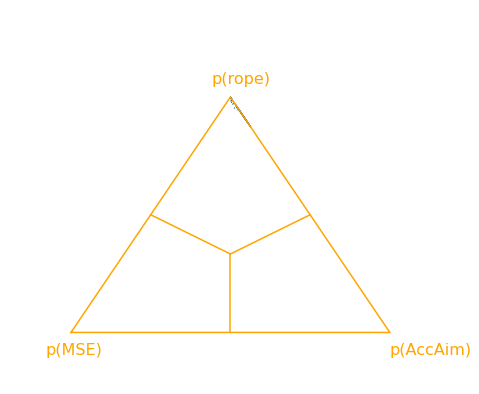

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


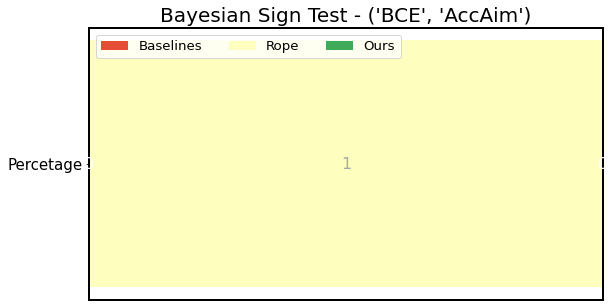

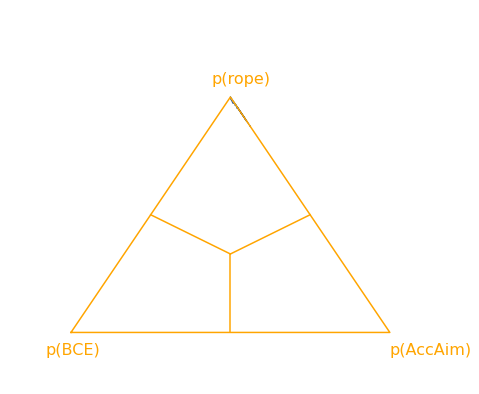

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.09824, P(F1Aim > MSE) = 0.90176
0.0 0.09824 0.90176


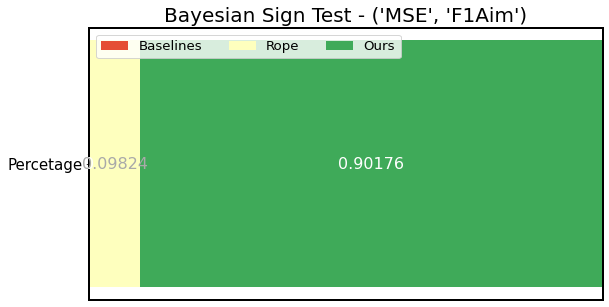

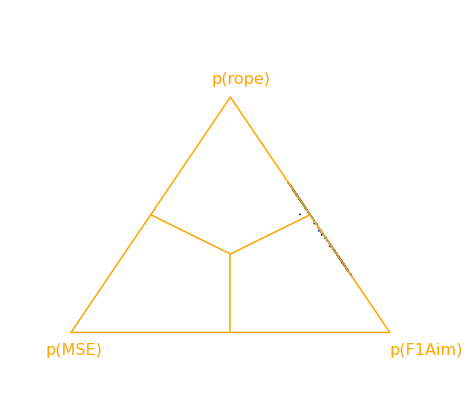

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.93006, P(F1Aim > BCE) = 0.06994
0.0 0.93006 0.06994


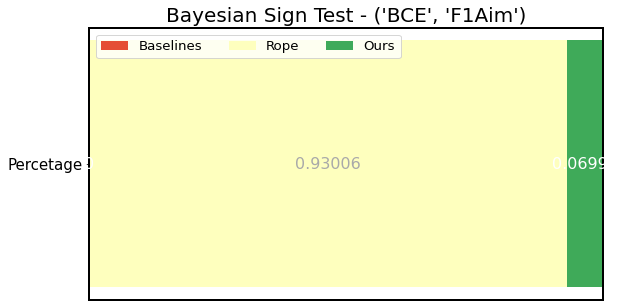

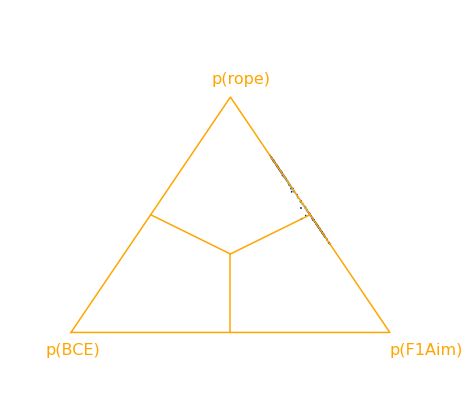

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.9937, P(F.5Aim > MSE) = 0.0063
0.0 0.9937 0.0063


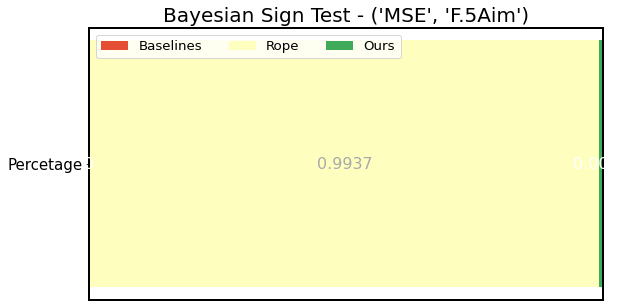

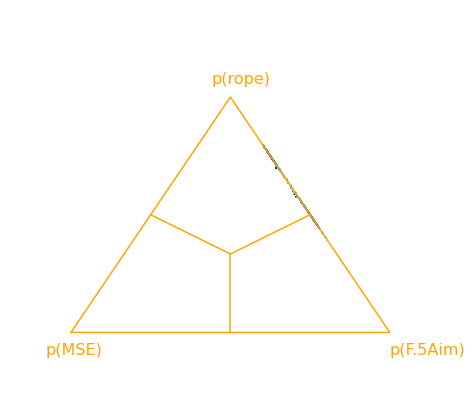

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > BCE) = 0.0
0.0 1.0 0.0


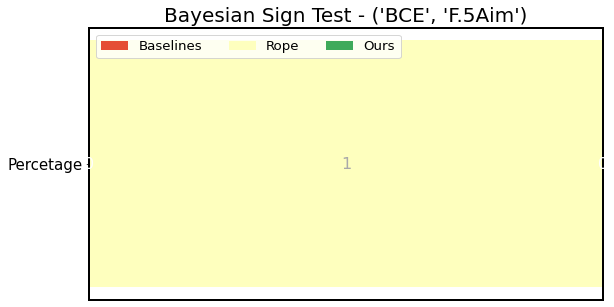

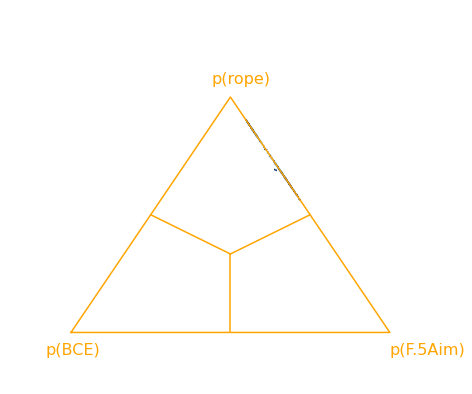

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


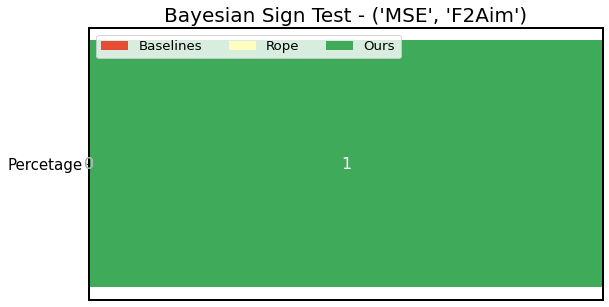

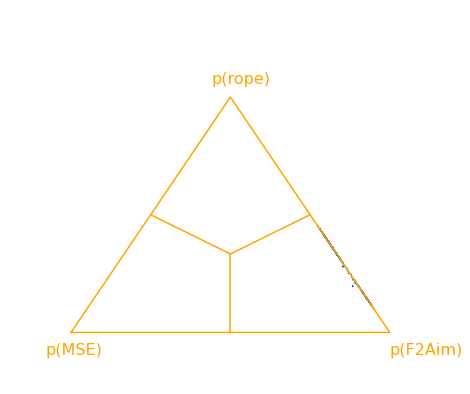

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.04396, P(F2Aim > BCE) = 0.95604
0.0 0.04396 0.95604


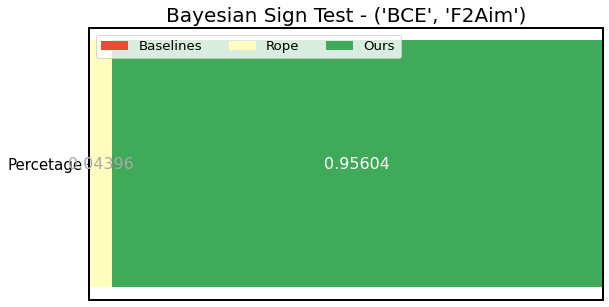

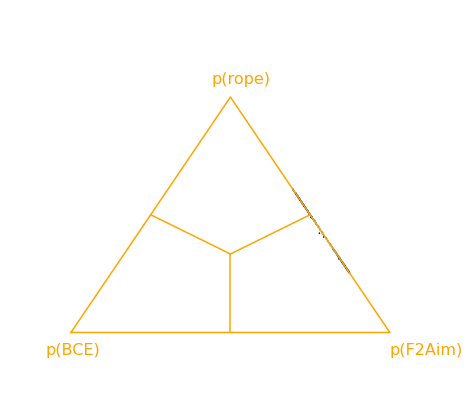

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.06816, P(GAim > MSE) = 0.93184
0.0 0.06816 0.93184


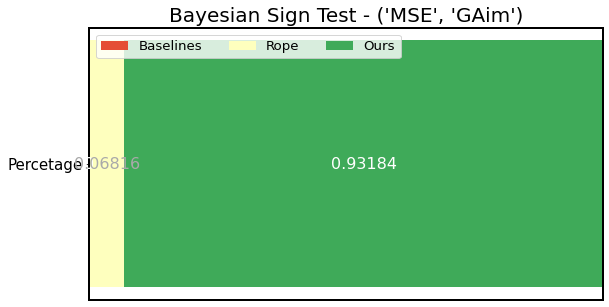

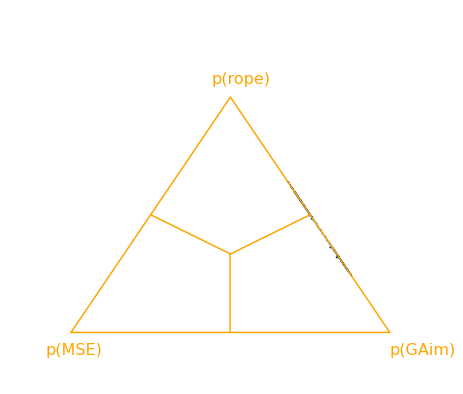

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.53932, P(GAim > BCE) = 0.46068
0.0 0.53932 0.46068


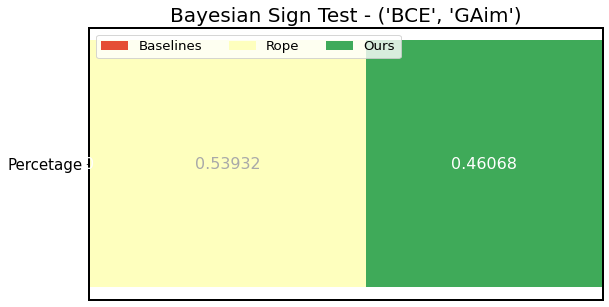

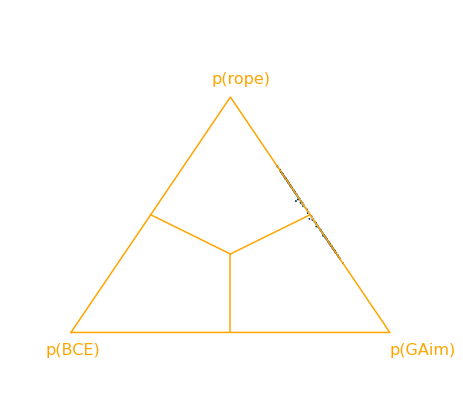

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.69056, P(BAim > MSE) = 0.30944
0.0 0.69056 0.30944


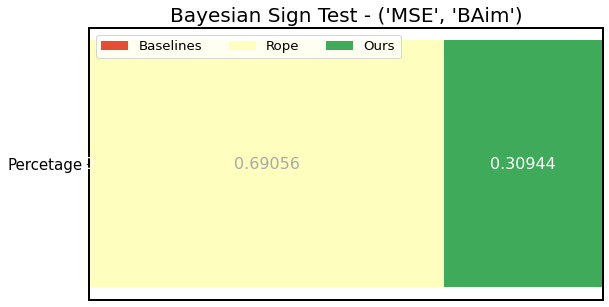

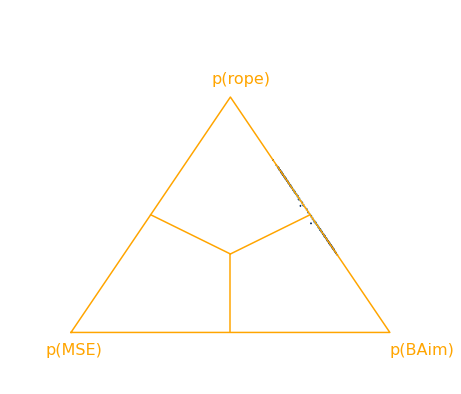

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.99962, P(BAim > BCE) = 0.00038
0.0 0.99962 0.00038


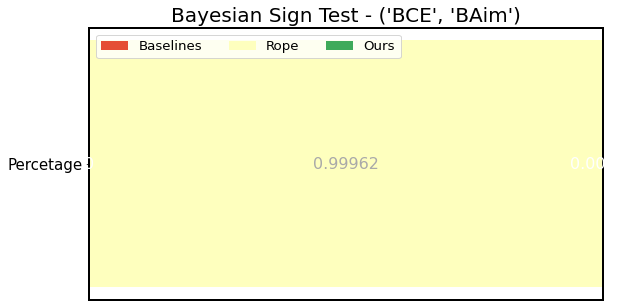

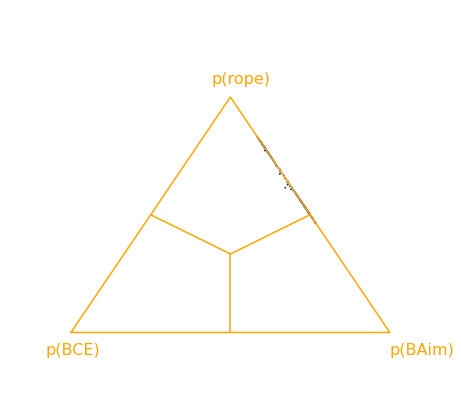

In [58]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.1, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.1)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [59]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 0.09824, 0.93006, 0.9937, 1.0, 0.0, 0.04396, 0.06816, 0.53932, 0.69056, 0.99962]
[0.0, 0.0, 0.90176, 0.06994, 0.0063, 0.0, 1.0, 0.95604, 0.93184, 0.46068, 0.30944, 0.00038]


In [60]:
# r = 0.1
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.09824,0.90176
3,BCE,F1Aim,0.0,0.93006,0.06994
4,MSE,F.5Aim,0.0,0.99370,0.00630
5,BCE,F.5Aim,0.0,1.00000,0.00000
6,MSE,F2Aim,0.0,0.00000,1.00000
7,BCE,F2Aim,0.0,0.04396,0.95604
8,MSE,GAim,0.0,0.06816,0.93184
9,BCE,GAim,0.0,0.53932,0.46068


In [61]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

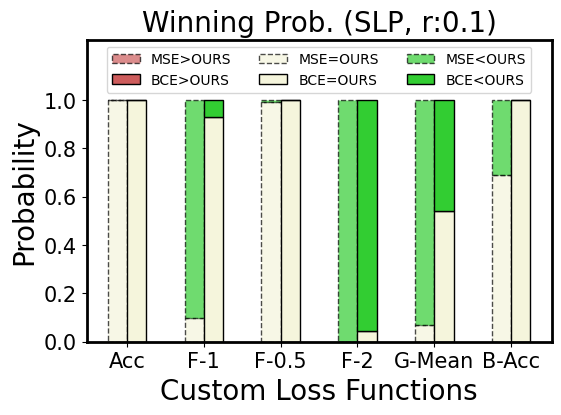

In [62]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.1)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [63]:
import bayesiantests as bt

In [64]:
# import glob
# import os
# import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('10CV_MLP_102datasets(12292023).csv')
df

,Unnamed: 0,Dataset,Delta,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,D,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,S,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,1,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,C,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,S,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
...,...,...,...,...,...,...,...,...,...,...
708,F1,S,0.8876,0.9425,0.9522,0.9456,0.9388,0.9349,0.9272,0.9345
709,F.5,105,0.9026,0.9467,0.9535,0.9463,0.9602,0.9099,0.8946,0.9099
710,F2,C,0.8734,0.9387,0.9511,0.9451,0.9187,0.9615,0.9625,0.9606
711,Gmean,S,0.9221,0.9628,0.9705,0.9669,0.9495,0.9787,0.9799,0.9782


In [66]:
df.rename(columns={'Unnamed: 0':'Metrics'}, inplace=True)
df.rename(columns={'Delta':'MSE'}, inplace=True)
df

,Metrics,Dataset,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,D,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,S,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,1,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,C,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,S,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
...,...,...,...,...,...,...,...,...,...,...
708,F1,S,0.8876,0.9425,0.9522,0.9456,0.9388,0.9349,0.9272,0.9345
709,F.5,105,0.9026,0.9467,0.9535,0.9463,0.9602,0.9099,0.8946,0.9099
710,F2,C,0.8734,0.9387,0.9511,0.9451,0.9187,0.9615,0.9625,0.9606
711,Gmean,S,0.9221,0.9628,0.9705,0.9669,0.9495,0.9787,0.9799,0.9782


In [67]:
df_a = df.drop('Dataset', axis=1)
df_a

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
...,...,...,...,...,...,...,...,...,...
708,F1,0.8876,0.9425,0.9522,0.9456,0.9388,0.9349,0.9272,0.9345
709,F.5,0.9026,0.9467,0.9535,0.9463,0.9602,0.9099,0.8946,0.9099
710,F2,0.8734,0.9387,0.9511,0.9451,0.9187,0.9615,0.9625,0.9606
711,Gmean,0.9221,0.9628,0.9705,0.9669,0.9495,0.9787,0.9799,0.9782


In [68]:
df.isnull().sum()

Metrics    101
Dataset      0
MSE          0
BCE          0
AccAim       0
F1Aim        0
F.5Aim       0
F2Aim        0
GAim         0
BAim         0
dtype: int64

In [69]:
df_b = df_a.fillna(0)
df_b[:10]

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
5,B_Acc,0.6872,0.7083,0.7198,0.7226,0.7028,0.7229,0.7552,0.7441
6,0,Delta,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
7,Acc,0.84,0.832,0.856,0.384,0.848,0.852,0.848,0.796
8,F1,0.7692,0.7663,0.7916,0.5546,0.7781,0.7881,0.7813,0.7331
9,F.5,0.8137,0.7913,0.84,0.4379,0.8317,0.8267,0.8239,0.7481


In [70]:
# df_b = df_b[df_b.Metrics != 'Pre']
# df_b = df_b[df_b.Metrics != 'Rec']
df_b = df_b[df_b.Metrics != 0]
df_b

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
...,...,...,...,...,...,...,...,...,...
708,F1,0.8876,0.9425,0.9522,0.9456,0.9388,0.9349,0.9272,0.9345
709,F.5,0.9026,0.9467,0.9535,0.9463,0.9602,0.9099,0.8946,0.9099
710,F2,0.8734,0.9387,0.9511,0.9451,0.9187,0.9615,0.9625,0.9606
711,Gmean,0.9221,0.9628,0.9705,0.9669,0.9495,0.9787,0.9799,0.9782


In [71]:
df_b = df_b.reset_index(drop=True)

In [72]:
df_b[:20]

,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,Acc,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,F1,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,F.5,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,F2,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,Gmean,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
5,B_Acc,0.6872,0.7083,0.7198,0.7226,0.7028,0.7229,0.7552,0.7441
6,Acc,0.84,0.832,0.856,0.384,0.848,0.852,0.848,0.796
7,F1,0.7692,0.7663,0.7916,0.5546,0.7781,0.7881,0.7813,0.7331
8,F.5,0.8137,0.7913,0.84,0.4379,0.8317,0.8267,0.8239,0.7481
9,F2,0.7351,0.7475,0.7512,0.7566,0.7336,0.7562,0.7471,0.7268


In [73]:
Data = []
for i in range(df_b.shape[0]):
    Data.append((i//6)+1)
print(Data)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 4

In [74]:
df_b.insert(loc=0, column='Dataset', value = Data)

In [75]:
df_b

,Dataset,Metrics,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
0,1,Acc,0.696,0.692,0.716,0.648,0.688,0.664,0.724,0.688
1,1,F1,0.5996,0.6421,0.6415,0.6767,0.6296,0.6702,0.6929,0.6889
2,1,F.5,0.5793,0.5918,0.603,0.572,0.5799,0.5772,0.6224,0.5959
3,1,F2,0.6295,0.7087,0.6914,0.8323,0.6967,0.8039,0.7857,0.8204
4,1,Gmean,0.6736,0.6965,0.7105,0.6316,0.6893,0.6794,0.7409,0.7094
...,...,...,...,...,...,...,...,...,...,...
607,102,F1,0.8876,0.9425,0.9522,0.9456,0.9388,0.9349,0.9272,0.9345
608,102,F.5,0.9026,0.9467,0.9535,0.9463,0.9602,0.9099,0.8946,0.9099
609,102,F2,0.8734,0.9387,0.9511,0.9451,0.9187,0.9615,0.9625,0.9606
610,102,Gmean,0.9221,0.9628,0.9705,0.9669,0.9495,0.9787,0.9799,0.9782


In [76]:
# data 'str'->'float'
df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)
df_b.dtypes

/tmp/57052.1.gpu/ipykernel_768935/2681397020.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)


Dataset      int64
Metrics     object
MSE        float64
BCE        float64
AccAim     float64
F1Aim      float64
F.5Aim     float64
F2Aim      float64
GAim       float64
BAim       float64
dtype: object

In [77]:
# Accuracy
df_acc = df_b[df_b['Metrics'] == "Acc"][['Dataset','Metrics','MSE','BCE','AccAim']]
df_acc = df_acc.reset_index(drop=True)
# F1
df_F1 = df_b[df_b['Metrics'] == "F1"][['Dataset','Metrics','MSE','BCE','F1Aim']]
df_F1 = df_F1.reset_index(drop=True)
# F.5
df_F05 = df_b[df_b['Metrics'] == "F.5"][['Dataset','Metrics','MSE','BCE','F.5Aim']]
df_F05 = df_F05.reset_index(drop=True)
# F2
df_F2 = df_b[df_b['Metrics'] == "F2"][['Dataset','Metrics','MSE','BCE','F2Aim']]
df_F2 = df_F2.reset_index(drop=True)
# Gmean
df_Gmean = df_b[df_b['Metrics'] == "Gmean"][['Dataset','Metrics','MSE','BCE','GAim']]
df_Gmean = df_Gmean.reset_index(drop=True)
# B_Acc
df_B_Acc = df_b[df_b['Metrics'] == "B_Acc"][['Dataset','Metrics','MSE','BCE','BAim']]
df_B_Acc = df_B_Acc.reset_index(drop=True)

In [78]:
df_acc

,Dataset,Metrics,MSE,BCE,AccAim
0,1,Acc,0.6960,0.6920,0.7160
1,2,Acc,0.8400,0.8320,0.8560
2,3,Acc,0.7649,0.7681,0.7452
3,4,Acc,0.8516,0.8742,0.8290
4,5,Acc,0.6937,0.6750,0.6875
...,...,...,...,...,...
97,98,Acc,0.9319,0.9317,0.9304
98,99,Acc,0.9137,0.9159,0.9183
99,100,Acc,0.9320,0.9351,0.9342
100,101,Acc,0.8209,0.8212,0.8204


In [79]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
def stacked_bar(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize='small')

    return fig, ax

In [80]:
# baselines = ['Delta','MSE','BCE']
baselines = ['MSE','BCE']
ours = ['AccAim','F1Aim','F.5Aim','F2Aim','GAim','BAim']
dfs = [df_acc,df_F1,df_F05,df_F2,df_Gmean,df_B_Acc]

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 0.99998, P(AccAim > MSE) = 2e-05
0.0 0.99998 2e-05


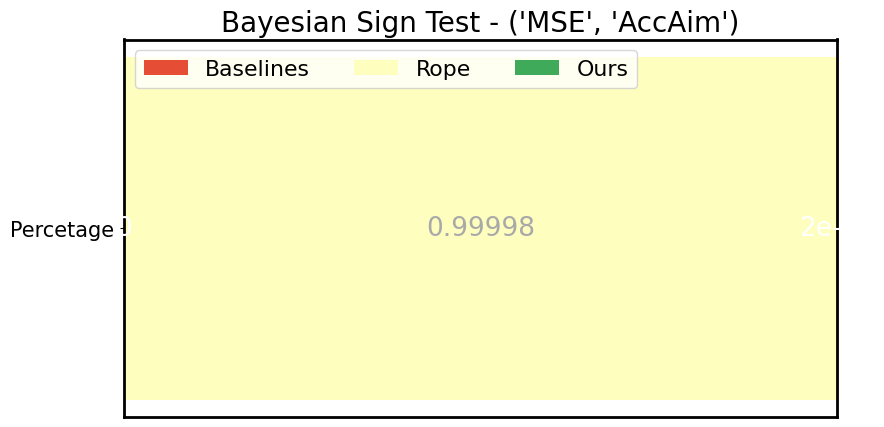

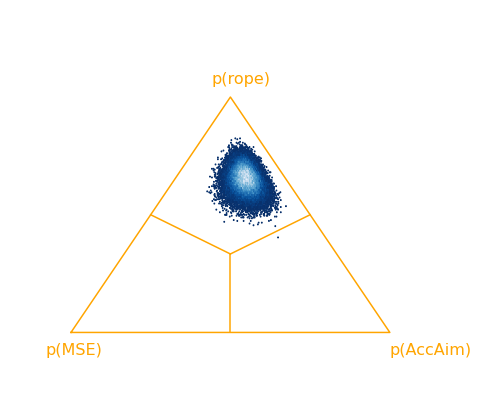

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 0.99998, P(AccAim > BCE) = 2e-05
0.0 0.99998 2e-05


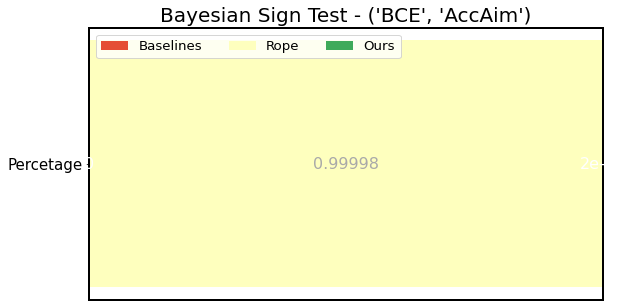

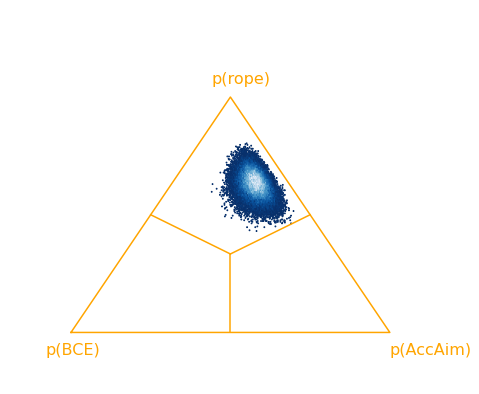

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > MSE) = 1.0
0.0 0.0 1.0


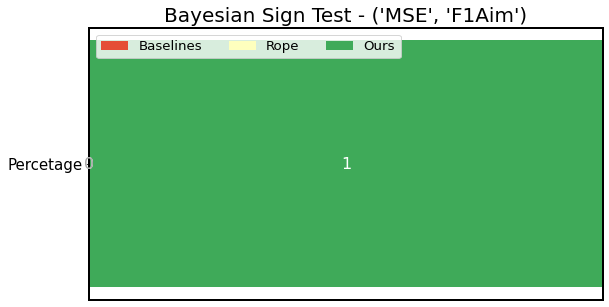

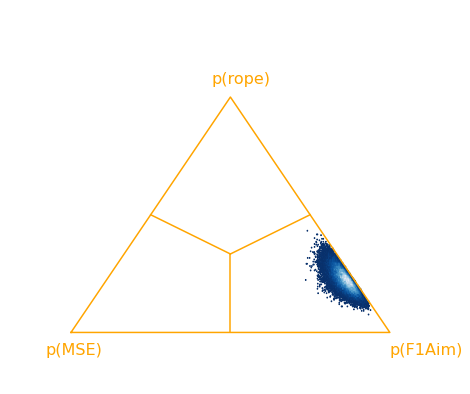

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > BCE) = 1.0
0.0 0.0 1.0


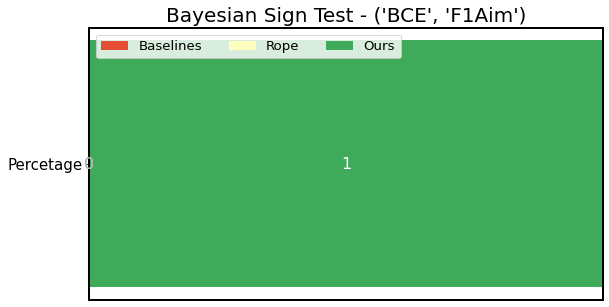

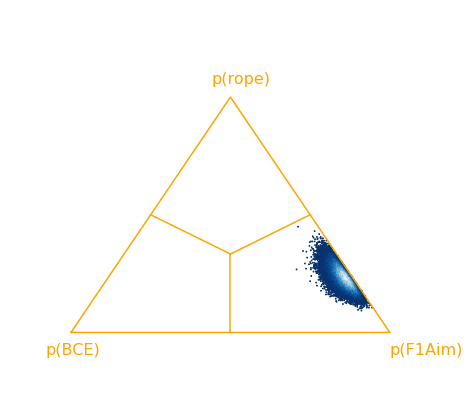

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.00148, P(F.5Aim > MSE) = 0.99852
0.0 0.00148 0.99852


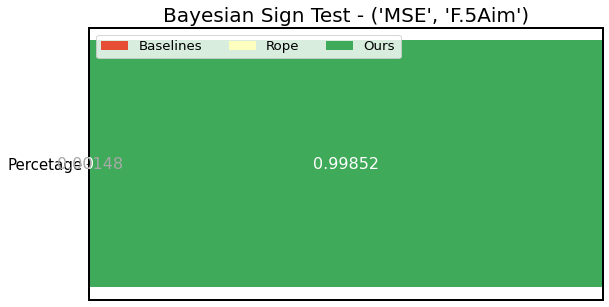

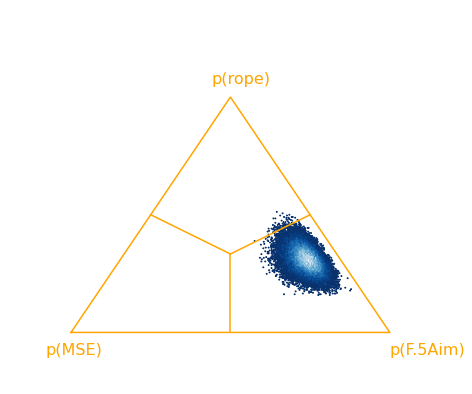

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.00164, P(F.5Aim > BCE) = 0.99836
0.0 0.00164 0.99836


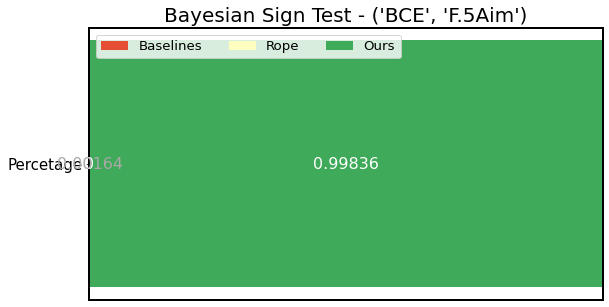

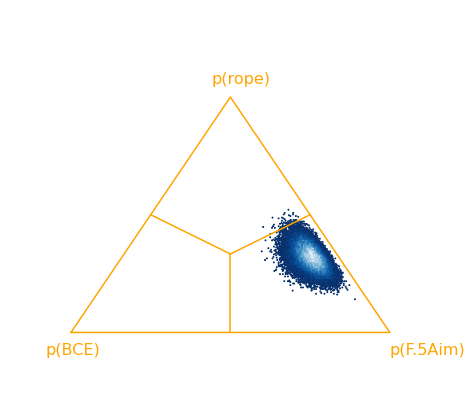

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


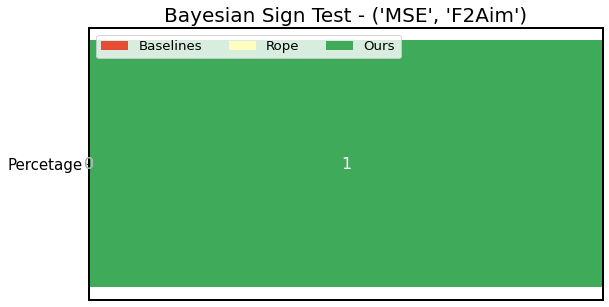

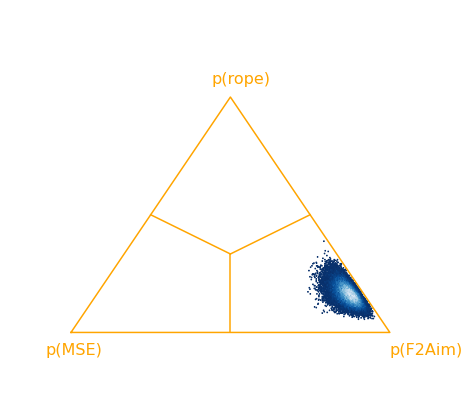

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > BCE) = 1.0
0.0 0.0 1.0


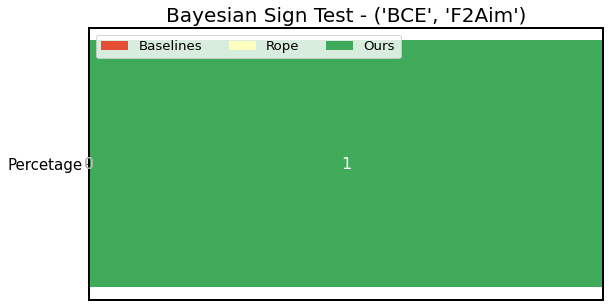

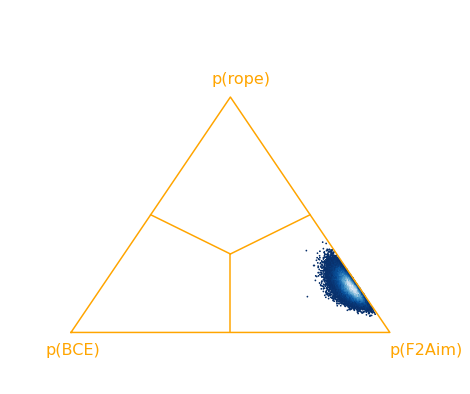

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.0, P(GAim > MSE) = 1.0
0.0 0.0 1.0


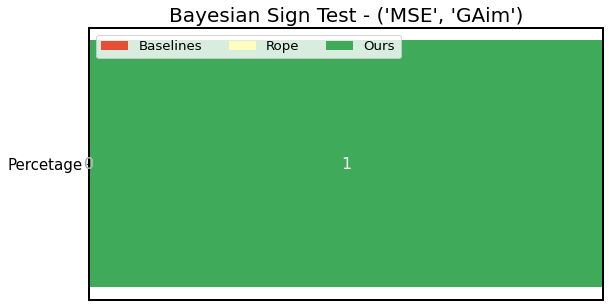

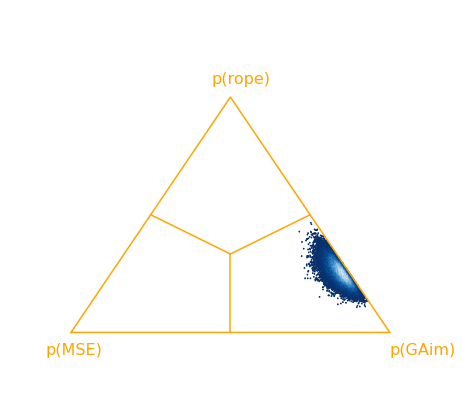

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.0, P(GAim > BCE) = 1.0
0.0 0.0 1.0


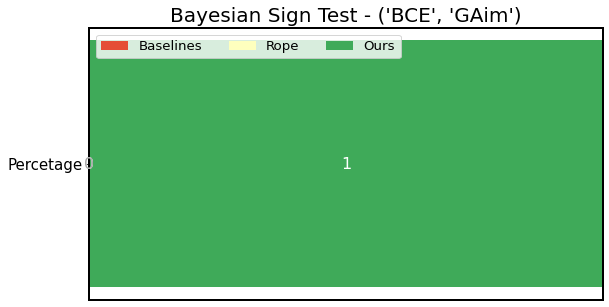

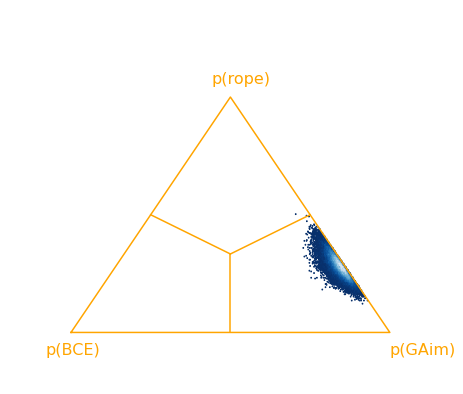

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.0, P(BAim > MSE) = 1.0
0.0 0.0 1.0


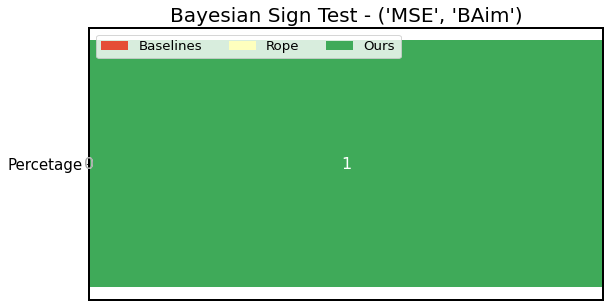

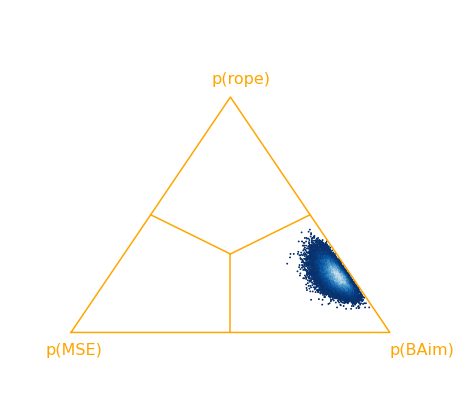

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 2e-05, P(BAim > BCE) = 0.99998
0.0 2e-05 0.99998


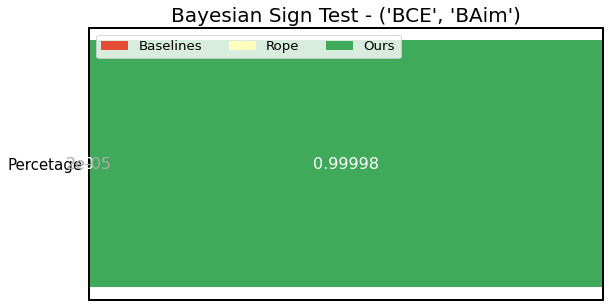

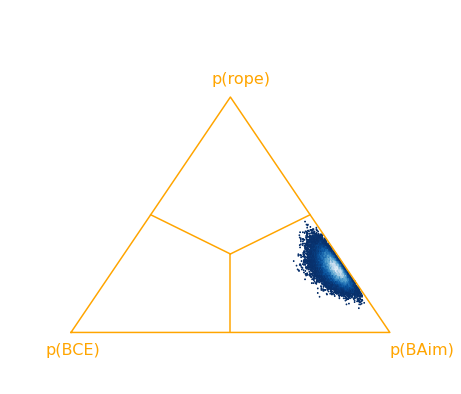

In [81]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.01, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.01)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [82]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.99998, 0.99998, 0.0, 0.0, 0.00148, 0.00164, 0.0, 0.0, 0.0, 0.0, 0.0, 2e-05]
[2e-05, 2e-05, 1.0, 1.0, 0.99852, 0.99836, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99998]


In [83]:
# r=0.01
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,0.99998,0.00002
1,BCE,AccAim,0.0,0.99998,0.00002
2,MSE,F1Aim,0.0,0.00000,1.00000
3,BCE,F1Aim,0.0,0.00000,1.00000
4,MSE,F.5Aim,0.0,0.00148,0.99852
5,BCE,F.5Aim,0.0,0.00164,0.99836
6,MSE,F2Aim,0.0,0.00000,1.00000
7,BCE,F2Aim,0.0,0.00000,1.00000
8,MSE,GAim,0.0,0.00000,1.00000
9,BCE,GAim,0.0,0.00000,1.00000


In [84]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

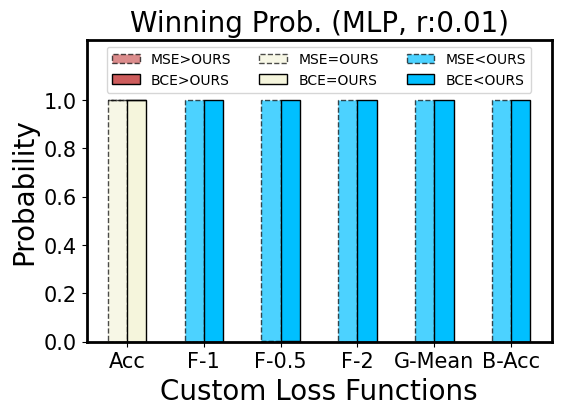

In [85]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.01)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

# 위에거 새로운 그래프로 만들어보기

In [86]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,0.99998,0.00002
1,BCE,AccAim,0.0,0.99998,0.00002
2,MSE,F1Aim,0.0,0.00000,1.00000
3,BCE,F1Aim,0.0,0.00000,1.00000
10,MSE,BAim,0.0,0.00000,1.00000
11,BCE,BAim,0.0,0.00002,0.99998


In [87]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
# plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기


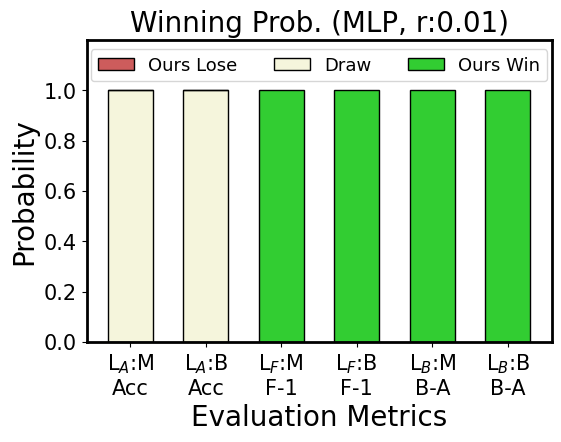

In [88]:
# plt.figure(figsize=(10, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
#          'L$_{F}$:M\nF-0.5','L$_{F}$:B\nF-0.5','L$_{F}$:M\nF-2','L$_{F}$:B\nF-2','L$_{G}$:M\nG-M','L$_{G}$:B\nG-M',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose    
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (MLP, r:0.01)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


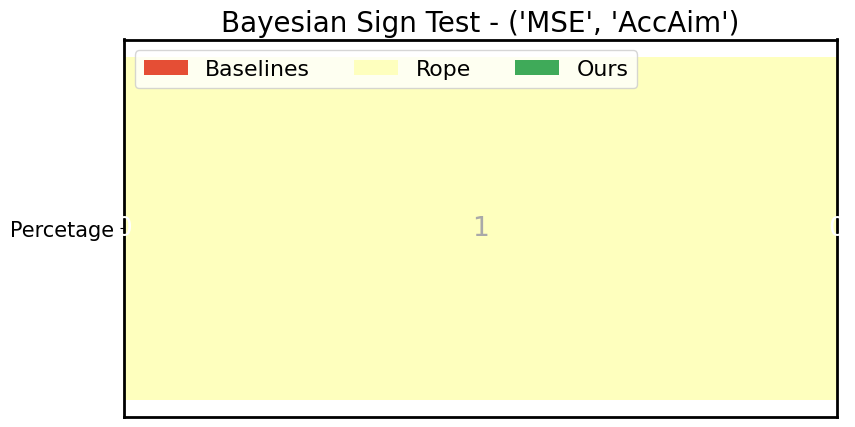

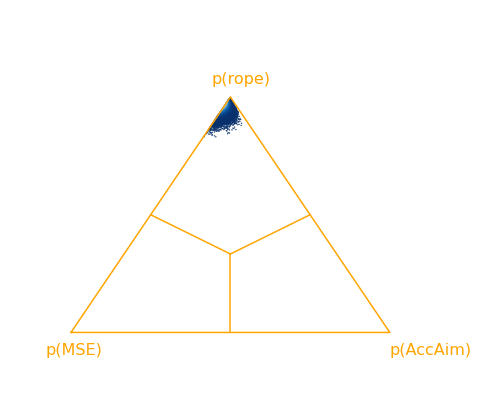

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


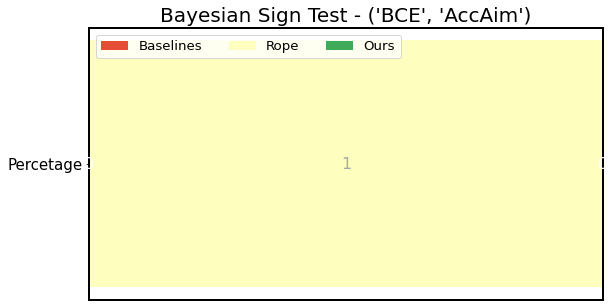

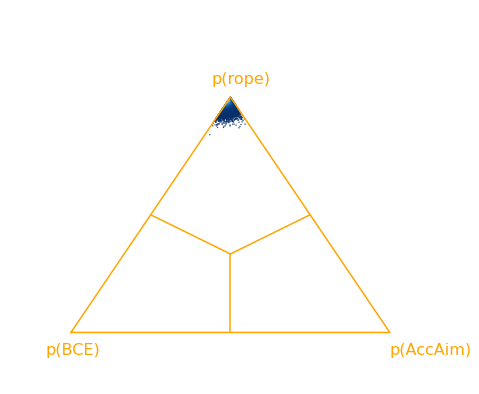

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.1546, P(F1Aim > MSE) = 0.8454
0.0 0.1546 0.8454


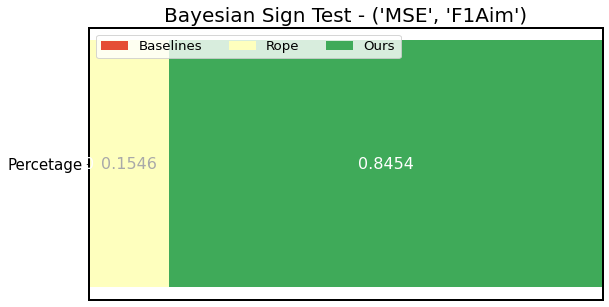

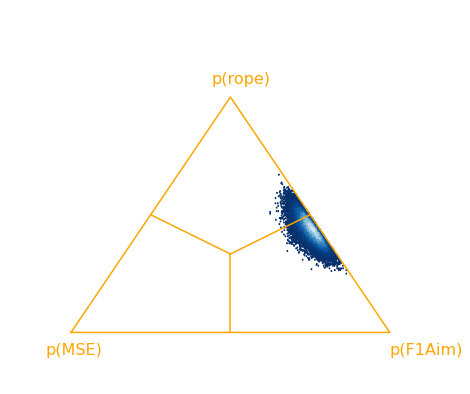

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.5009, P(F1Aim > BCE) = 0.4991
0.0 0.5009 0.4991


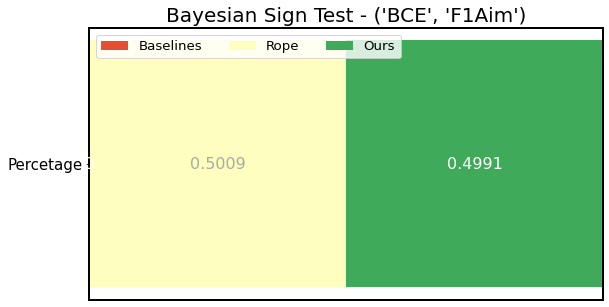

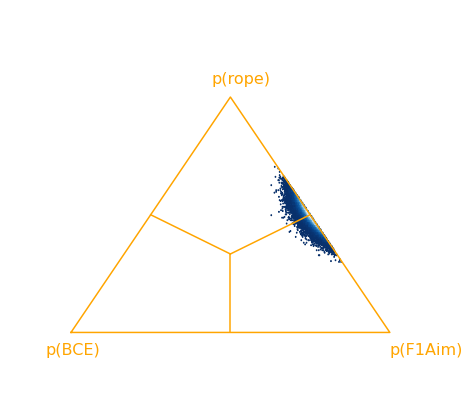

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.99106, P(F.5Aim > MSE) = 0.00894
0.0 0.99106 0.00894


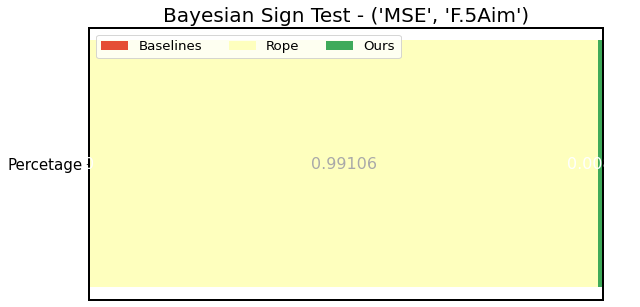

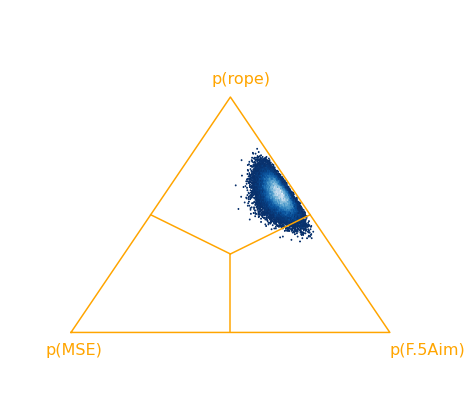

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.99852, P(F.5Aim > BCE) = 0.00148
0.0 0.99852 0.00148


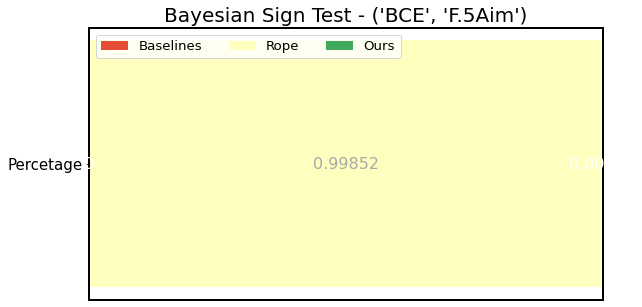

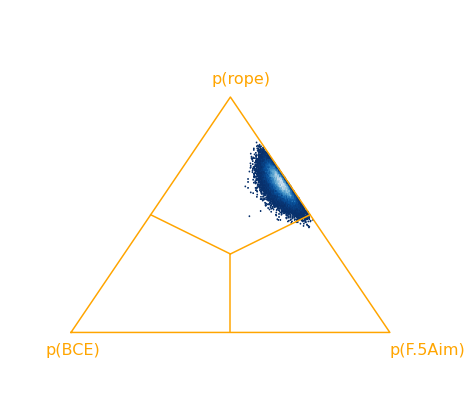

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.00012, P(F2Aim > MSE) = 0.99988
0.0 0.00012 0.99988


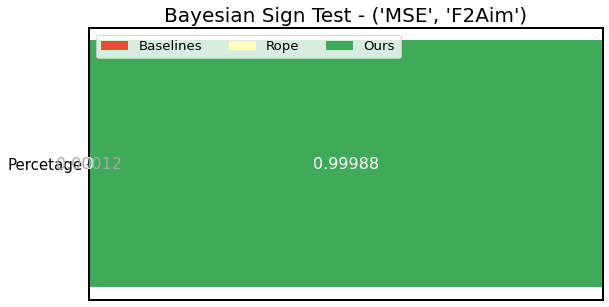

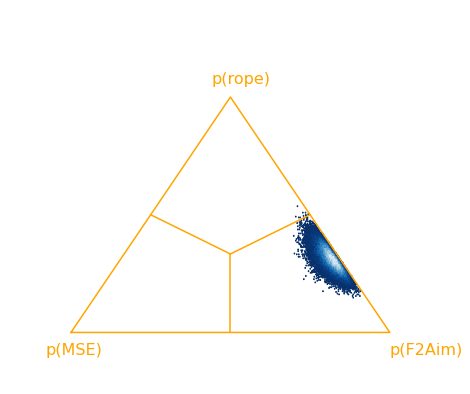

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.0011, P(F2Aim > BCE) = 0.9989
0.0 0.0011 0.9989


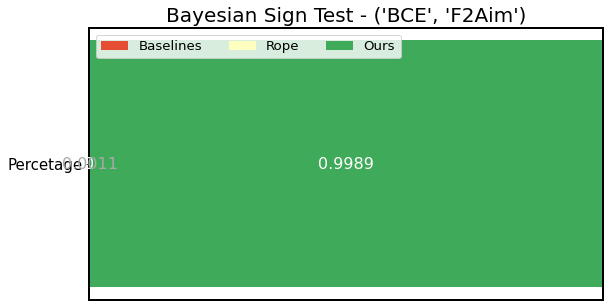

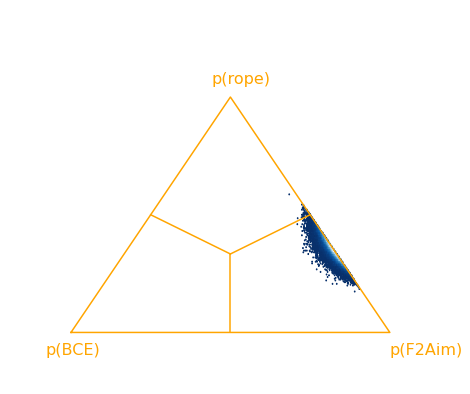

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.30798, P(GAim > MSE) = 0.69202
0.0 0.30798 0.69202


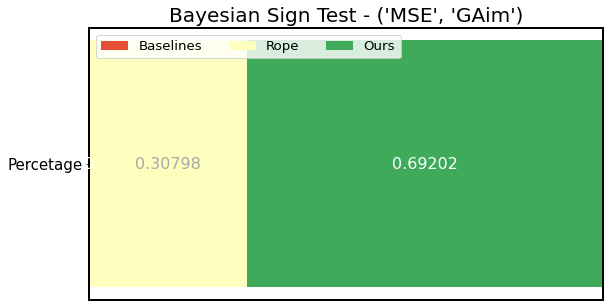

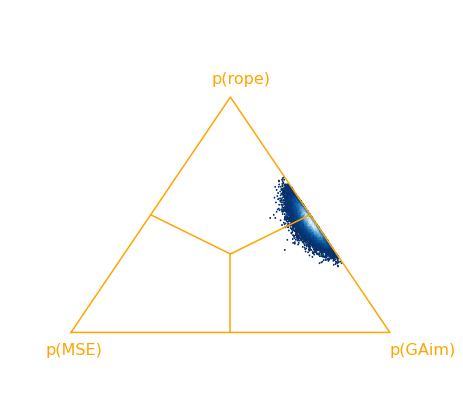

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.311, P(GAim > BCE) = 0.689
0.0 0.311 0.689


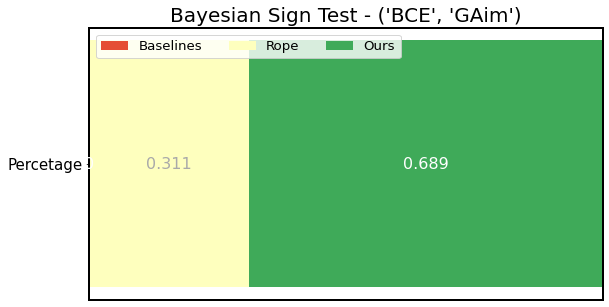

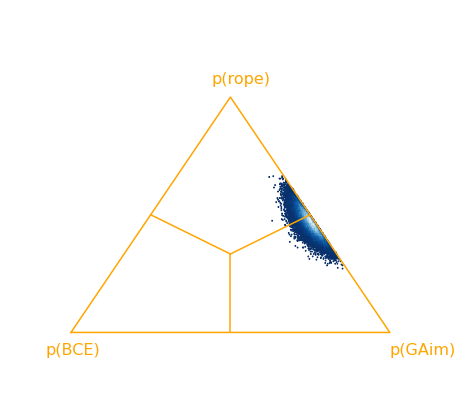

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.81684, P(BAim > MSE) = 0.18316
0.0 0.81684 0.18316


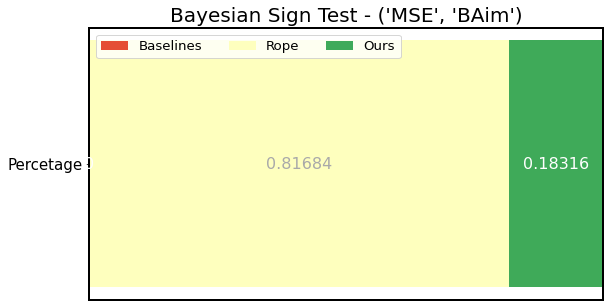

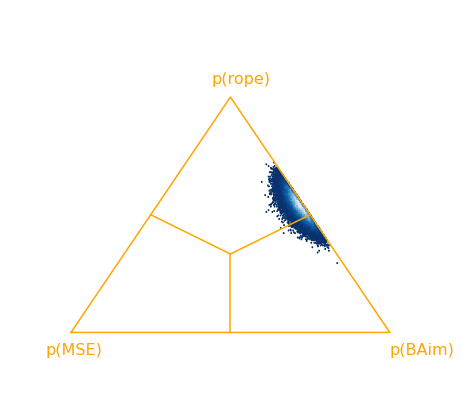

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.90298, P(BAim > BCE) = 0.09702
0.0 0.90298 0.09702


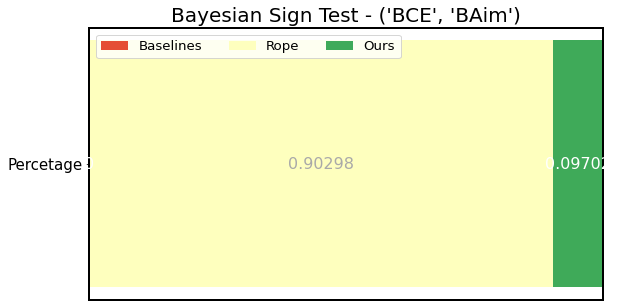

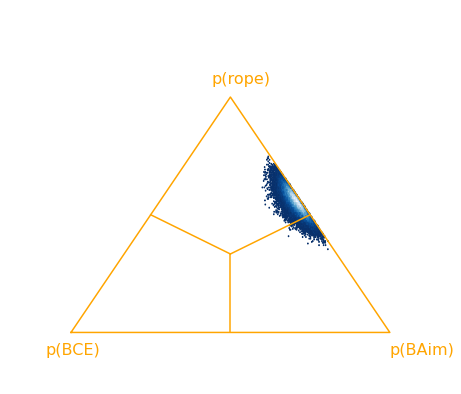

In [89]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.05, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.05)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [90]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 0.1546, 0.5009, 0.99106, 0.99852, 0.00012, 0.0011, 0.30798, 0.311, 0.81684, 0.90298]
[0.0, 0.0, 0.8454, 0.4991, 0.00894, 0.00148, 0.99988, 0.9989, 0.69202, 0.689, 0.18316, 0.09702]


In [91]:
# r=0.05
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.15460,0.84540
3,BCE,F1Aim,0.0,0.50090,0.49910
4,MSE,F.5Aim,0.0,0.99106,0.00894
5,BCE,F.5Aim,0.0,0.99852,0.00148
6,MSE,F2Aim,0.0,0.00012,0.99988
7,BCE,F2Aim,0.0,0.00110,0.99890
8,MSE,GAim,0.0,0.30798,0.69202
9,BCE,GAim,0.0,0.31100,0.68900


In [92]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

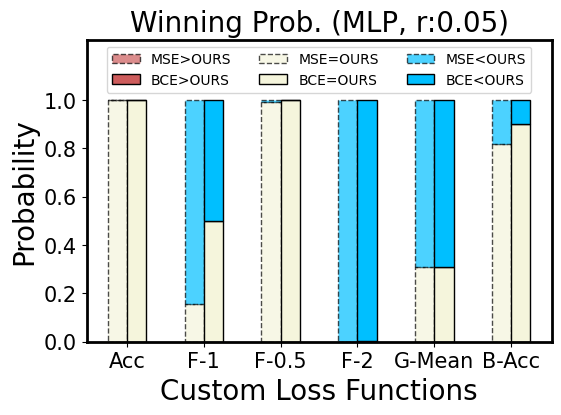

In [93]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

# 위에거 새로운 그래프로 만들어보기

In [94]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.15460,0.84540
3,BCE,F1Aim,0.0,0.50090,0.49910
10,MSE,BAim,0.0,0.81684,0.18316
11,BCE,BAim,0.0,0.90298,0.09702


In [95]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
# plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기


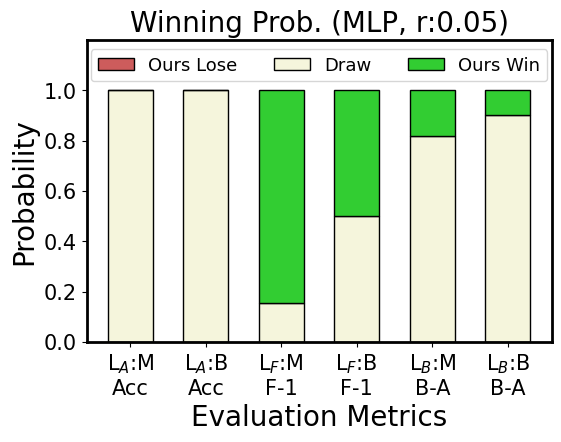

In [96]:
# plt.figure(figsize=(10, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
#          'L$_{F}$:M\nF-0.5','L$_{F}$:B\nF-0.5','L$_{F}$:M\nF-2','L$_{F}$:B\nF-2','L$_{G}$:M\nG-M','L$_{G}$:B\nG-M',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose    
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (MLP, r:0.05)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


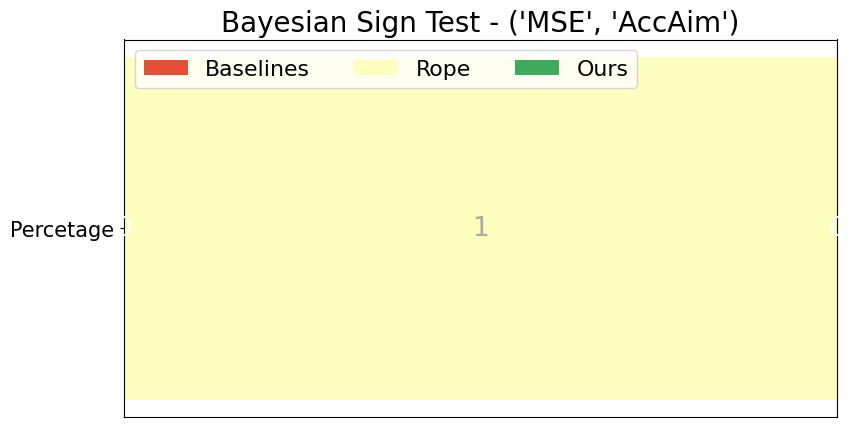

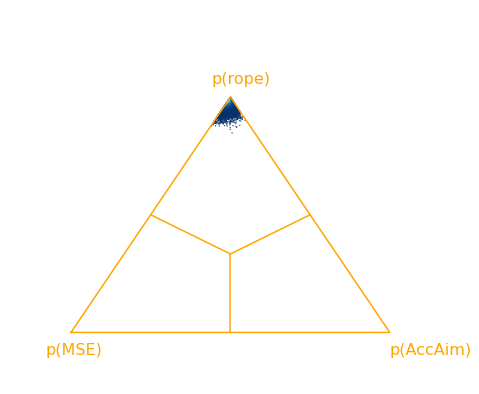

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


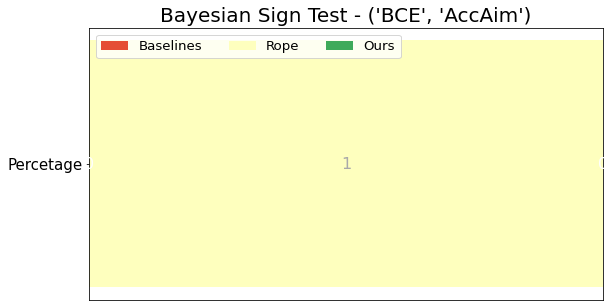

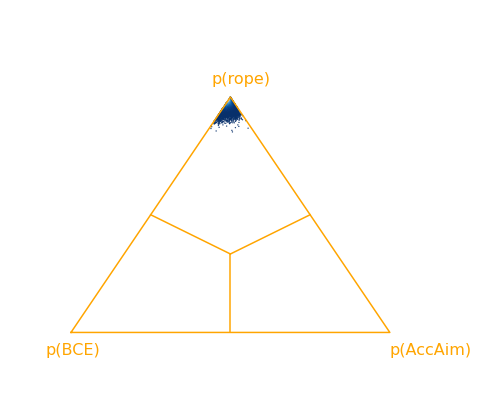

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.97206, P(F1Aim > MSE) = 0.02794
0.0 0.97206 0.02794


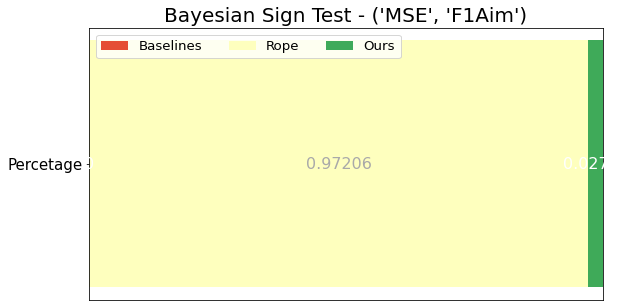

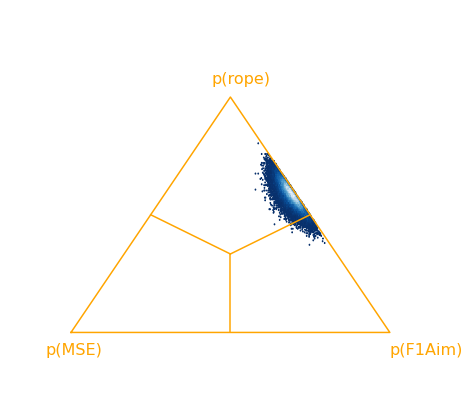

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.97696, P(F1Aim > BCE) = 0.02304
0.0 0.97696 0.02304


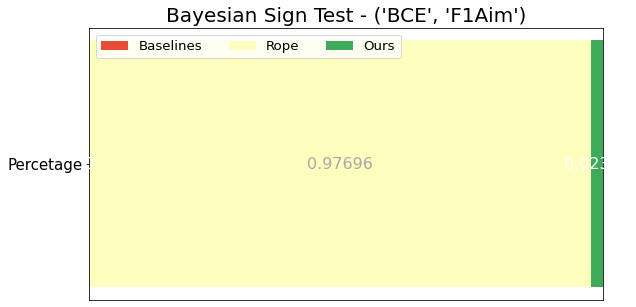

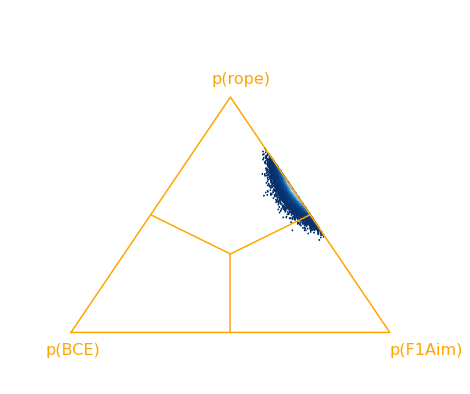

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > MSE) = 0.0
0.0 1.0 0.0


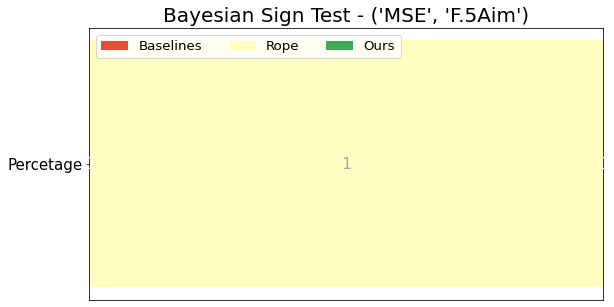

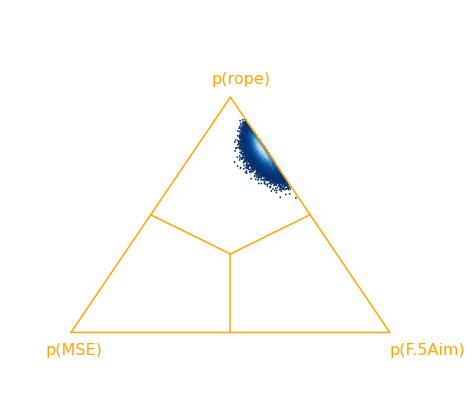

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > BCE) = 0.0
0.0 1.0 0.0


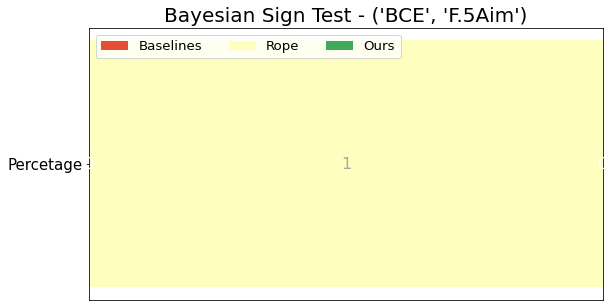

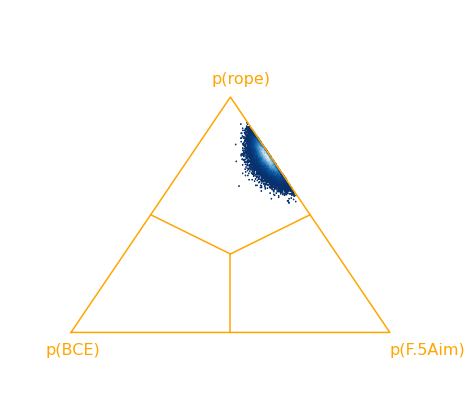

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.2816, P(F2Aim > MSE) = 0.7184
0.0 0.2816 0.7184


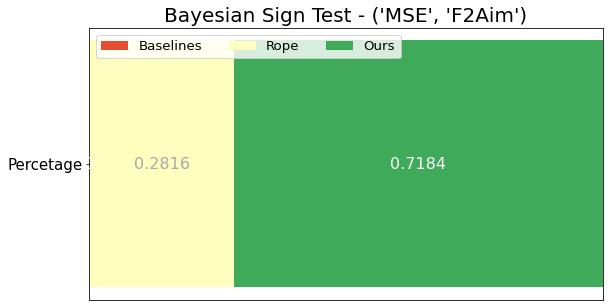

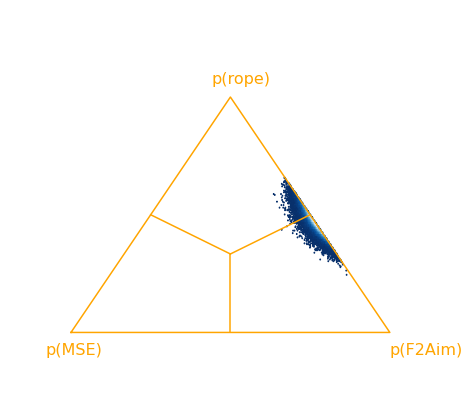

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.57952, P(F2Aim > BCE) = 0.42048
0.0 0.57952 0.42048


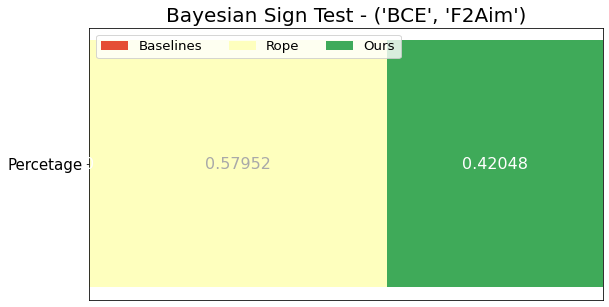

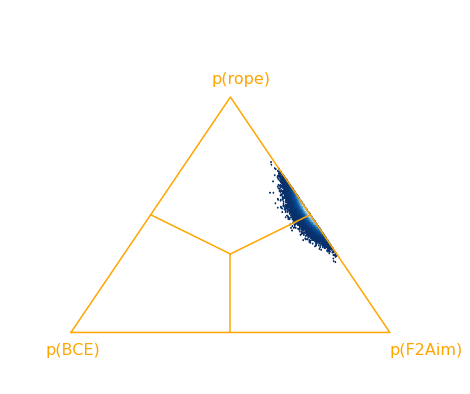

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.9551, P(GAim > MSE) = 0.0449
0.0 0.9551 0.0449


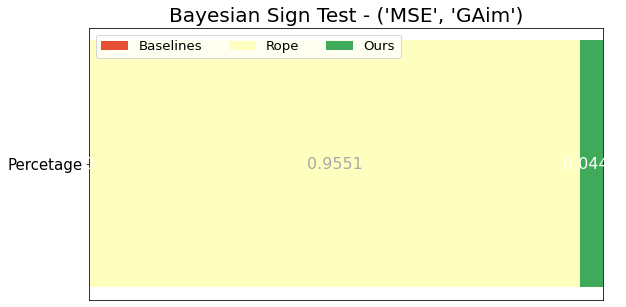

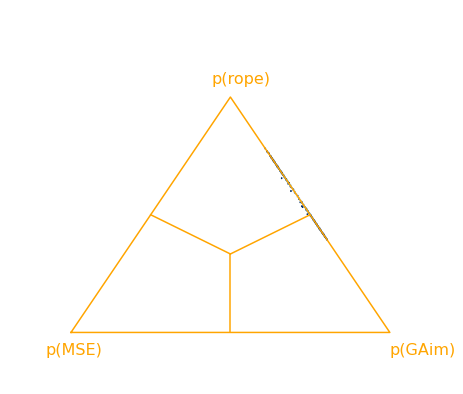

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.98102, P(GAim > BCE) = 0.01898
0.0 0.98102 0.01898


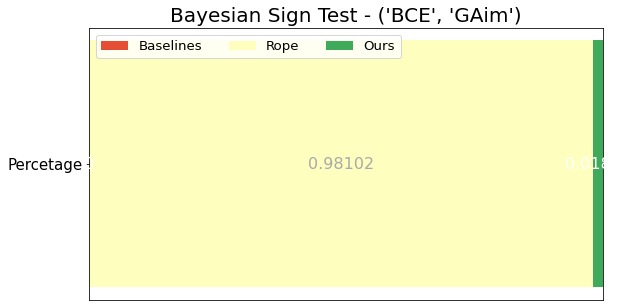

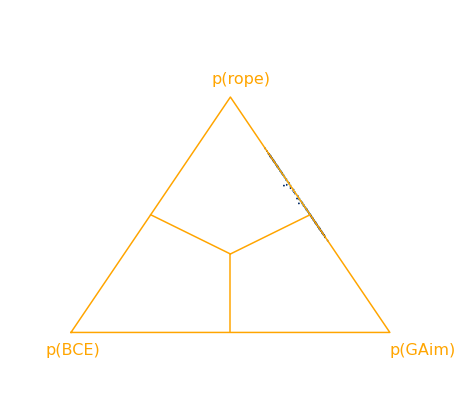

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.99998, P(BAim > MSE) = 2e-05
0.0 0.99998 2e-05


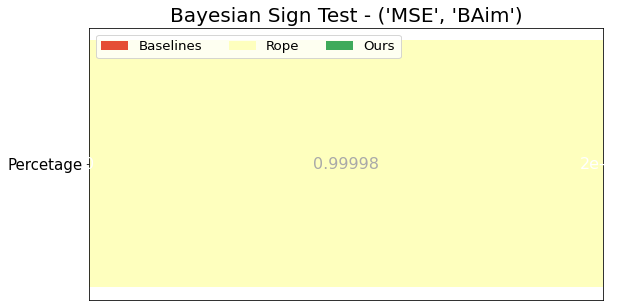

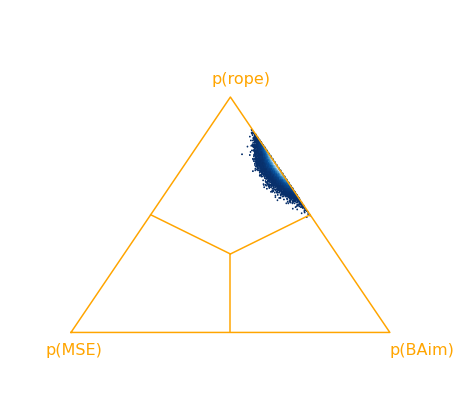

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 1.0, P(BAim > BCE) = 0.0
0.0 1.0 0.0


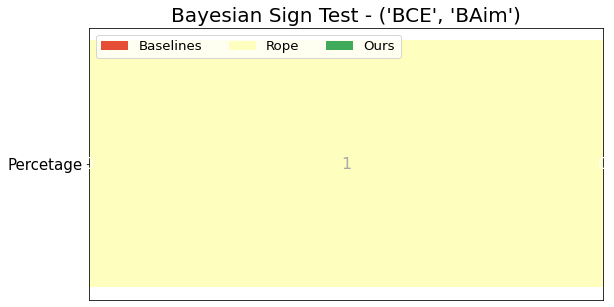

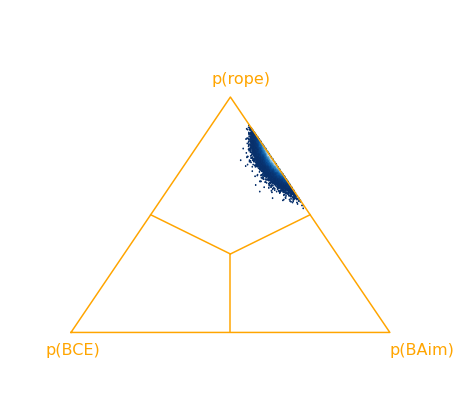

In [199]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.1, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        
        # Triangles
        %matplotlib inline
#         plt.rcParams['figure.facecolor'] = 'black'
        samples = bt.signtest_MC(X, rope=0.1)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [200]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 0.97206, 0.97696, 1.0, 1.0, 0.2816, 0.57952, 0.9551, 0.98102, 0.99998, 1.0]
[0.0, 0.0, 0.02794, 0.02304, 0.0, 0.0, 0.7184, 0.42048, 0.0449, 0.01898, 2e-05, 0.0]


In [201]:
# r=0.1
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

,Baseline,Ours,Basewin_prob,Draw_prob,Ourswin_prob
0,MSE,AccAim,0.0,1.00000,0.00000
1,BCE,AccAim,0.0,1.00000,0.00000
2,MSE,F1Aim,0.0,0.97206,0.02794
3,BCE,F1Aim,0.0,0.97696,0.02304
4,MSE,F.5Aim,0.0,1.00000,0.00000
5,BCE,F.5Aim,0.0,1.00000,0.00000
6,MSE,F2Aim,0.0,0.28160,0.71840
7,BCE,F2Aim,0.0,0.57952,0.42048
8,MSE,GAim,0.0,0.95510,0.04490
9,BCE,GAim,0.0,0.98102,0.01898


In [202]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20  
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.figure(figsize=(10,10))

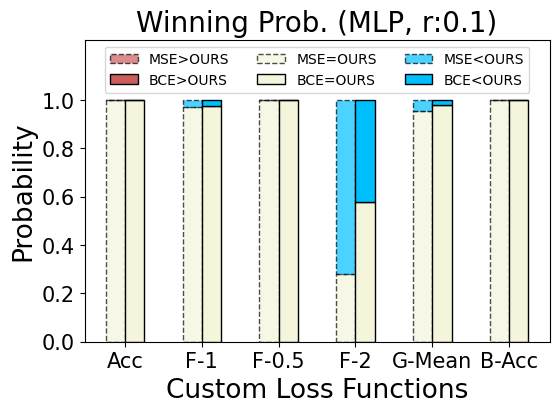

In [203]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE    
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.1)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()